In [1079]:
import pandas as pd 
#pd.set_option('compute.use_numexpr', False)
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import gzip
import yaml
import requests
import csv
import re
from tqdm import tqdm
from itertools import product
import json
import pickle
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [1080]:
import pandas as pd 
#pd.set_option('compute.use_numexpr', False)
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import gzip

import csv
import pandas as pd 
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
import time
import numpy as np
from pprint import pprint

import spacy  # For preprocessing
import nltk
import string

import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.models as gsm
from gensim.test.utils import datapath

import regex


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision.transforms as transforms
from torch.autograd import Variable

torch.manual_seed(1)

In [1081]:
# # ### Load propublica data
# propub = pd.read_csv( 'data/en-US',low_memory=False) #(28189, 6)

# propub.head(10) #852799 rows × 11 columns

# # import zipfile

# # zf = zipfile.ZipFile('data/en-US.zip') 
# # # if you want to see all files inside zip folder
# # zf.namelist() 
# # # now read your csv file 
# # df = pd.read_csv(zf.open('data/en-US.csv'))


In [1082]:
# ### Load predicted fb all (predicted_fb_all) 0.8 million
predicted_fb_all = pd.read_csv( 'data/predicted_all_para.csv',low_memory=False) #(28189, 6)

predicted_fb_all #852799 rows × 11 columns




,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0
3,653784258879707,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001443', 'age': '18-24', 'g...",3,2,2
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
852794,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0
852795,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0
852796,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0
852797,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0


In [1083]:
predicted_fb_all.tail(150) 

#Club for Growth Action #C #American Potential Fund#C
#The Lincoln Project #L #Committee to Protect Medicare#L #United We Dream Action#L




,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
852649,387796429015109,"I know Joe Biden, and I know he’ll make a grea...",BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,4,0
852650,398711548182833,"I know Joe Biden, and I know he’ll make a grea...",BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '1', 'age': '35-44', 'gender':...",0,4,0
852651,743152116276601,Esta elección es la más importante elección de...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.004545', 'age': '55-64', 'g...",3,-1,0
852652,796787941114767,We have to vote for Joe Biden in numbers that ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001079', 'age': '45-54', 'g...",0,3,0
852653,1227019391015703,"I know Joe Biden, and I know he’ll make a grea...",BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.025641', 'age': '45-54', 'g...",0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
852794,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0
852795,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0
852796,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0
852797,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0


## Swing state info for Wisconsin, Pennsylvania

In [1084]:
# #Swing state info for Wisconsin, Pennsylvania
# ad_id = []
# stance_p = []
# text = []
# fe = []
# start = []
# stop = []
# imp = []
# spend = []
# region = []
# demo = []
# issue_p = []
# for j in range (0, predicted_fb_all.shape[0] ):
#     dic = eval(predicted_fb_all['region_distribution'][j])[0]
#     if dic['region'] == 'Wisconsin' or dic['region'] == 'Pennsylvania':
#         ad_id.append(predicted_fb_all.id[j])
#         text.append(predicted_fb_all.ad_creative_body[j])
#         fe.append(predicted_fb_all.funding_entity[j])
#         start.append(predicted_fb_all.ad_delivery_start_time[j])
#         stop.append(predicted_fb_all.ad_delivery_stop_time[j])
#         imp.append(predicted_fb_all.impressions[j])
#         spend.append(predicted_fb_all.spend[j])
#         region.append(predicted_fb_all.region_distribution[j])
#         demo.append(predicted_fb_all.demographic_distribution[j])
#         stance_p.append(predicted_fb_all.pred_stance[j])
#         issue_p.append(predicted_fb_all.pred_issue[j])



            

#Only pennsylvania

#Swing state info for Wisconsin, Pennsylvania, Florida, Michighan
ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
impression = []
imp_upper = []
imp_lower = []
spend_upper = []
spend_lower = []
# for j in range (0, predicted_fb_all.shape[0] ):
#     dic = eval(predicted_fb_all['region_distribution'][j])[0]
#     if dic['region'] == 'Pennsylvania' : #'Pennsylvania':
#         ad_id.append(predicted_fb_all.id[j])
#         text.append(predicted_fb_all.ad_creative_body[j])
#         fe.append(predicted_fb_all.funding_entity[j])
#         start.append(predicted_fb_all.ad_delivery_start_time[j])
#         stop.append(predicted_fb_all.ad_delivery_stop_time[j])
#         imp.append(predicted_fb_all.impressions[j])
#         spend.append(predicted_fb_all.spend[j])
#         region.append(predicted_fb_all.region_distribution[j])
#         demo.append(predicted_fb_all.demographic_distribution[j])
#         stance_p.append(predicted_fb_all.pred_stance[j])
#         issue_p.append(predicted_fb_all.pred_issue[j])


for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['region_distribution'][j])
#     list_imp_dic = eval(predicted_fb_all['impressions'][j])
#     list_spend_dic = eval(predicted_fb_all['spend'][j])
#     print (list_dic, list_imp_dic, list_imp_dic['upper_bound'], list_spend_dic, list_spend_dic['lower_bound'])
#     sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Pennsylvania' : #'Pennsylvania':
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            start.append(predicted_fb_all.ad_delivery_start_time[j])
            stop.append(predicted_fb_all.ad_delivery_stop_time[j])
            imp.append(predicted_fb_all.impressions[j])
            spend.append(predicted_fb_all.spend[j])
            region.append(predicted_fb_all.region_distribution[j])
            demo.append(predicted_fb_all.demographic_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])

                                                           
                                                           
# for j in range (0, swing.shape[0] ):
#     list_dic = eval(swing['demographic_distribution'][j])
#     for i in range (0, len(list_dic)):
#         #print(list_dic[i])  
#         dic = list_dic[i]
#         #print(dic['age'] )
#         #sys.exit()
#         if dic['age'] == '13-17' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])

In [1085]:
#eval(predicted_fb_all['region_distribution'][0])[0]['region']

In [1086]:
swing = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            })

In [1087]:
swing #451576 

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2
1,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3
2,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2
3,2507744629528044,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.217391', 'age': '25-34', 'g...",2,3
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4
...,...,...,...,...,...,...,...,...,...,...,...
451571,991508644587877,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008333', 'region': 'Nevada'...","[{'percentage': '0.016667', 'age': '25-34', 'g...",3,6
451572,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10
451573,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10
451574,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10


In [1088]:
impression = []

for j in range (0, swing.shape[0] ):
    list_dic = eval(swing['region_distribution'][j])
    #print(list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Pennsylvania' :
            impression.append(dic['percentage'])
#         print(dic)
#         sys.exit()
        
        

In [1089]:
len(impression)

451576

In [1090]:
swing['reg_imp'] = impression
swing['reg_imp'] =  swing['reg_imp'].astype(float)
swing

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2,1.000000
1,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3,1.000000
2,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2,1.000000
3,2507744629528044,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.217391', 'age': '25-34', 'g...",2,3,1.000000
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
451571,991508644587877,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008333', 'region': 'Nevada'...","[{'percentage': '0.016667', 'age': '25-34', 'g...",3,6,0.033333
451572,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.005405
451573,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.015942
451574,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.022722


In [1091]:
# sort_swing = swing.sort_values(by = 'reg_imp', ascending = False)
# print(sort_swing)
top_swing = swing.loc[(swing['reg_imp'] > 0.1)] #ads having > 10% regional impressions in PA
top_swing = top_swing.reset_index(drop=True)
print(top_swing)

                      id                                   ad_creative_body  \
0        621482761788913  Trump is a "climate arsonist" and "climate den...   
1        810003639786906  The former vice president emphasized his commi...   
2        664254741166305  Trump is a "climate arsonist" and "climate den...   
3       2507744629528044  The former vice president emphasized his commi...   
4        810669683067159  83% of Trump's tax giveaway will flow to the t...   
...                  ...                                                ...   
102434  1582949411913883  “We deserve better as a country.” Just one of ...   
102435  2782079008739433  “We deserve better as a country.” Just one of ...   
102436  2800349690183550  “We deserve better as a country.” Just one of ...   
102437  3398130810269121  “We deserve better as a country.” Just one of ...   
102438  2480065575627370  Swats away flies and lies. Get yours today: \n...   

             funding_entity ad_delivery_start_time 

In [1092]:
#drop "none" (-1) issue, state
new_swing = top_swing[top_swing.pred_issue != -1]
new_swing2 = new_swing[new_swing.pred_stance != -1]
new_swing2 = new_swing2.reset_index(drop=True)
new_swing2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2,1.000000
1,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3,1.000000
2,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2,1.000000
3,2507744629528044,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.217391', 'age': '25-34', 'g...",2,3,1.000000
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
99502,1582949411913883,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.06932', 'region': 'Arizona'...","[{'percentage': '0.00212', 'age': '45-54', 'ge...",3,3,0.253316
99503,2782079008739433,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.062943', 'region': 'Arizona...","[{'percentage': '0.000259', 'age': '65+', 'gen...",3,3,0.207710
99504,2800349690183550,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-27,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.055379', 'region': 'Arizona...","[{'percentage': '0.001044', 'age': '35-44', 'g...",3,3,0.188713
99505,3398130810269121,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.076557', 'region': 'Arizona...","[{'percentage': '0.000457', 'age': '65+', 'gen...",3,3,0.255946


In [1093]:
###Use groupby() function to form groups based on more than one category (i.e. Use more than one column to perform the splitting).
## gkk = df.groupby(['Team', 'Position']) 
###for color coded
dfc = new_swing2.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                   
pred_stance     0      1     2     3
pred_issue                          
0              29   2175   107   346
1             333    838    88  5243
2             312    236    43  1586
3             577  10437  5663  1418
4             705    347   620  4012
5             170    338    27   424
6             325   3229  1348   267
7              48    534    10    55
8             446    288    97  1642
9              43   2106  2672  1038
10           1277  33491  1175  5328
11             39   6477   852   413
12              3    153    29    48

In [1262]:

## create contingency table

contingency = pd.crosstab(new_swing2['pred_stance'], new_swing2["pred_issue"])
#print(contingency)

##create row percentage for gender from gender contingency table
contingency1 = contingency.div(contingency.sum(axis=1), axis=0)
#print(contingency1)
contingency_per = (contingency1*100).round()
print(contingency_per)


pred_issue    0     1    2     3     4    5     6    7     8     9     10  \
pred_stance                                                                 
0            1.0   8.0  7.0  13.0  16.0  4.0   8.0  1.0  10.0   1.0  30.0   
1            4.0   1.0  0.0  17.0   1.0  1.0   5.0  1.0   0.0   3.0  55.0   
2            1.0   1.0  0.0  44.0   5.0  0.0  11.0  0.0   1.0  21.0   9.0   
3            2.0  24.0  7.0   6.0  18.0  2.0   1.0  0.0   8.0   5.0  24.0   

pred_issue     11   12  
pred_stance             
0             1.0  0.0  
1            11.0  0.0  
2             7.0  0.0  
3             2.0  0.0  


In [1274]:
contingency_per.loc[0][0], contingency_per.loc[0][1]

(1.0, 8.0)

In [1276]:
names_pb = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_pb = [ contingency_per.loc[0][0], contingency_per.loc[0][1], contingency_per.loc[0][2], contingency_per.loc[0][3], contingency_per.loc[0][4], contingency_per.loc[0][5], contingency_per.loc[0][6], contingency_per.loc[0][7], contingency_per.loc[0][8], contingency_per.loc[0][9], contingency_per.loc[0][10], contingency_per.loc[0][11], contingency_per.loc[0][12]]
#plt.bar(names_pb, values_pb, color = 'green')

names_at = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_at = [ contingency_per.loc[3][0], contingency_per.loc[3][1], contingency_per.loc[3][2], contingency_per.loc[3][3], contingency_per.loc[3][4], contingency_per.loc[3][5], contingency_per.loc[3][6], contingency_per.loc[3][7], contingency_per.loc[3][8], contingency_per.loc[3][9], contingency_per.loc[3][10], contingency_per.loc[3][11], contingency_per.loc[3][12]]


names_pt = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_pt = [ contingency_per.loc[1][0], contingency_per.loc[1][1], contingency_per.loc[1][2], contingency_per.loc[1][3], contingency_per.loc[1][4], contingency_per.loc[1][5], contingency_per.loc[1][6], contingency_per.loc[1][7], contingency_per.loc[1][8], contingency_per.loc[1][9], contingency_per.loc[1][10], contingency_per.loc[1][11], contingency_per.loc[1][12]]


names_ab = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_ab = [ contingency_per.loc[2][0], contingency_per.loc[2][1], contingency_per.loc[2][2], contingency_per.loc[2][3], contingency_per.loc[2][4], contingency_per.loc[2][5], contingency_per.loc[2][6], contingency_per.loc[2][7], contingency_per.loc[2][8], contingency_per.loc[2][9], contingency_per.loc[2][10], contingency_per.loc[2][11], contingency_per.loc[2][12]]


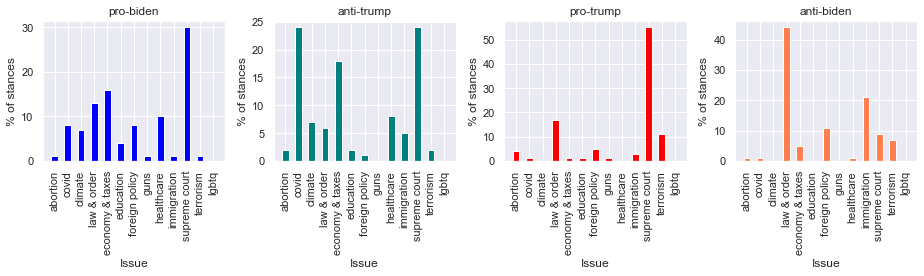

In [1285]:
plt.figure(figsize=(13,4))
plt.subplot(1, 4, 1)
plt.bar( names_pb, values_pb, color = 'blue', width = 0.5)
plt.title('pro-biden', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 2)
plt.bar( names_at, values_at, color = 'teal',  width = 0.5)
plt.title('anti-trump', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 3)
plt.bar( names_pt, values_pt, color = 'red',  width = 0.5)
plt.title('pro-trump', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 4)
plt.bar( names_ab, values_ab, color = 'coral',  width = 0.5)
plt.title('anti-biden', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

#plt.savefig("image/stance_issue_per_PA.png", dpi=300, bbox_inches = "tight") 

## Blue state NY

In [1141]:
# #Blue state info for California , New York
# ad_id = []
# stance_p = []
# text = []
# fe = []
# start = []
# stop = []
# imp = []
# spend = []
# region = []
# demo = []
# issue_p = []
# for j in range (0, predicted_fb_all.shape[0] ):
#     dic = eval(predicted_fb_all['region_distribution'][j])[0]
#     if dic['region'] == 'New York' or dic['region'] == 'California':
#         ad_id.append(predicted_fb_all.id[j])
#         text.append(predicted_fb_all.ad_creative_body[j])
#         fe.append(predicted_fb_all.funding_entity[j])
#         start.append(predicted_fb_all.ad_delivery_start_time[j])
#         stop.append(predicted_fb_all.ad_delivery_stop_time[j])
#         imp.append(predicted_fb_all.impressions[j])
#         spend.append(predicted_fb_all.spend[j])
#         region.append(predicted_fb_all.region_distribution[j])
#         demo.append(predicted_fb_all.demographic_distribution[j])
#         stance_p.append(predicted_fb_all.pred_stance[j])
#         issue_p.append(predicted_fb_all.pred_issue[j])

#Blue state info for New York
ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['region_distribution'][j])
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'New York' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            start.append(predicted_fb_all.ad_delivery_start_time[j])
            stop.append(predicted_fb_all.ad_delivery_stop_time[j])
            imp.append(predicted_fb_all.impressions[j])
            spend.append(predicted_fb_all.spend[j])
            region.append(predicted_fb_all.region_distribution[j])
            demo.append(predicted_fb_all.demographic_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        


                                                      

In [1142]:
blue = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) #34200, (NY = 5552)

In [1143]:
blue

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1
1,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1
2,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4
3,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8
4,357617868835725,Don’t let Donald Trump raise the cost of presc...,Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008', 'region': 'Alabama'},...","[{'percentage': '0.008028', 'age': '25-34', 'g...",3,8
...,...,...,...,...,...,...,...,...,...,...,...
389783,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.333333', 'region': 'Califor...","[{'percentage': '0.333333', 'age': '55-64', 'g...",0,10
389784,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10
389785,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10
389786,2765797337011737,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.1', 'region': 'California'}...","[{'percentage': '0.1', 'age': '55-64', 'gender...",0,10


In [1144]:
impression = []

for j in range (0, blue.shape[0] ):
    list_dic = eval(blue['region_distribution'][j])
    #print(list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'New York' :
            impression.append(dic['percentage'])
#         print(dic)
#         sys.exit()
        

In [1145]:
blue['reg_imp'] = impression
blue['reg_imp'] =  blue['reg_imp'].astype(float)
blue

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1,0.021122
1,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1,0.023599
2,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4,0.014000
3,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8,0.009804
4,357617868835725,Don’t let Donald Trump raise the cost of presc...,Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008', 'region': 'Alabama'},...","[{'percentage': '0.008028', 'age': '25-34', 'g...",3,8,0.009143
...,...,...,...,...,...,...,...,...,...,...,...,...
389783,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.333333', 'region': 'Califor...","[{'percentage': '0.333333', 'age': '55-64', 'g...",0,10,0.666667
389784,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.090570
389785,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.087991
389786,2765797337011737,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.1', 'region': 'California'}...","[{'percentage': '0.1', 'age': '55-64', 'gender...",0,10,0.100000


In [1146]:
top_blue = blue.loc[(blue['reg_imp'] > 0.1)] #ads having > 10% regional impressions in NY
top_blue = top_blue.reset_index(drop=True)
print(top_blue)

                     id                                   ad_creative_body  \
0      2840069269573211  A lot of pundits are in denial. They think thi...   
1      3385816044865105  Don’t scroll away just yet — this is important...   
2       269497537832229  A lot of pundits are in denial. They think thi...   
3       861478011340529  I need to know we pulled out all the stops to ...   
4       712266809375431  A lot of pundits are in denial. They think thi...   
...                 ...                                                ...   
44581  2480065575627370  Swats away flies and lies. Get yours today: \n...   
44582  3097119380394798  Swats away flies and lies. Get yours today: \n...   
44583  3796917330330480  Swats away flies and lies. Get yours today: \n...   
44584   852836738857491  You’ve heard from Joe. You’ve heard from Kamal...   
44585  2558726044418112  You’ve heard from Joe. You’ve heard from Kamal...   

           funding_entity ad_delivery_start_time ad_delivery_st

In [1147]:
#drop "none" (-1) issue, stance
#drop "none" (-1) issue, state

new_blue = top_blue[top_blue.pred_issue != -1]
new_blue2 = new_blue[new_blue.pred_stance != -1]
new_blue2 = new_blue2.reset_index(drop=True)
new_blue2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,2020-11-01,2020-11-03,"{'lower_bound': '175000', 'upper_bound': '1999...","{'lower_bound': '2500', 'upper_bound': '2999'}","[{'percentage': '0.005491', 'region': 'Alabama...","[{'percentage': '0.001568', 'age': '55-64', 'g...",3,4,0.101781
1,3385816044865105,Don’t scroll away just yet — this is important...,BIDEN VICTORY FUND,2020-11-01,2020-11-04,{'lower_bound': '1000000'},"{'lower_bound': '60000', 'upper_bound': '69999'}","[{'percentage': '0.004769', 'region': 'Alabama...","[{'percentage': '0.001843', 'age': '45-54', 'g...",3,4,0.112428
2,269497537832229,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,2020-11-01,2020-11-02,"{'lower_bound': '100000', 'upper_bound': '1249...","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '0.006779', 'region': 'Alabama...","[{'percentage': '0.003948', 'age': '35-44', 'g...",3,4,0.103728
3,861478011340529,I need to know we pulled out all the stops to ...,BIDEN VICTORY FUND,2020-11-01,2020-11-02,"{'lower_bound': '70000', 'upper_bound': '79999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.006955', 'region': 'Alabama...","[{'percentage': '0.002596', 'age': '45-54', 'g...",3,4,0.115440
4,712266809375431,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,2020-11-01,2020-11-03,"{'lower_bound': '200000', 'upper_bound': '2499...","{'lower_bound': '3000', 'upper_bound': '3499'}","[{'percentage': '0.007106', 'region': 'Alabama...","[{'percentage': '0.001782', 'age': '55-64', 'g...",3,4,0.100213
...,...,...,...,...,...,...,...,...,...,...,...,...
39201,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.021277', 'region': 'Illinoi...","[{'percentage': '0.021277', 'age': '25-34', 'g...",3,6,0.106383
39202,3097119380394798,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.035714', 'region': 'Minneso...","[{'percentage': '0.035714', 'age': '55-64', 'g...",3,6,0.107143
39203,3796917330330480,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.041667', 'region': 'Marylan...","[{'percentage': '0.041667', 'age': '45-54', 'g...",3,6,0.125000
39204,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.113514


In [1148]:
###Use groupby() function to form groups based on more than one category (i.e. Use more than one column to perform the splitting).
dfc = new_blue2.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                       
pred_stance       0       1      2       3
pred_issue                                
0               NaN   719.0   17.0   144.0
1              17.0   370.0    7.0  1344.0
2             208.0    88.0   20.0  1451.0
3              80.0  3058.0  977.0  1177.0
4            1770.0   308.0  868.0  9315.0
5              10.0    79.0    5.0   355.0
6              64.0  1820.0   23.0   117.0
7               3.0   650.0   12.0    41.0
8             117.0   145.0   53.0   540.0
9               9.0   570.0  379.0   601.0
10            117.0  7509.0  259.0  1950.0
11              5.0   798.0  126.0   558.0
12              2.0   299.0   27.0    25.0

pred_issue    0    1    2     3     4    5     6    7    8     9     10   11  \
pred_stance                                                                    
0            0.0  1.0  9.0   3.0  74.0  0.0   3.0  0.0  5.0   0.0   5.0  0.0   
1            4.0  2.0  1.0  19.0   2.0  0.0  11.0  4.0  1.0   3.0  46.0  5.0   
2            1.0  0.0  1.0  35.0  31.0  0.0   1.0  0.0  2.0  14.0   9.0  5.0   
3            1.0  8.0  8.0   7.0  53.0  2.0   1.0  0.0  3.0   3.0  11.0  3.0   

pred_issue    12  
pred_stance       
0            0.0  
1            2.0  
2            1.0  
3            0.0  


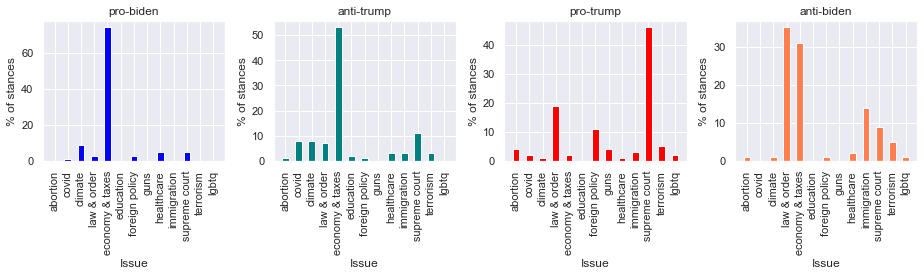

In [1286]:
## create contingency table

contingency = pd.crosstab(new_blue2['pred_stance'], new_blue2["pred_issue"])
#print(contingency)

##create row percentage for gender from gender contingency table
contingency1 = contingency.div(contingency.sum(axis=1), axis=0)
#print(contingency1)
contingency_per = (contingency1*100).round()
print(contingency_per)

names_pb = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_pb = [ contingency_per.loc[0][0], contingency_per.loc[0][1], contingency_per.loc[0][2], contingency_per.loc[0][3], contingency_per.loc[0][4], contingency_per.loc[0][5], contingency_per.loc[0][6], contingency_per.loc[0][7], contingency_per.loc[0][8], contingency_per.loc[0][9], contingency_per.loc[0][10], contingency_per.loc[0][11], contingency_per.loc[0][12]]
#plt.bar(names_pb, values_pb, color = 'green')

names_at = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_at = [ contingency_per.loc[3][0], contingency_per.loc[3][1], contingency_per.loc[3][2], contingency_per.loc[3][3], contingency_per.loc[3][4], contingency_per.loc[3][5], contingency_per.loc[3][6], contingency_per.loc[3][7], contingency_per.loc[3][8], contingency_per.loc[3][9], contingency_per.loc[3][10], contingency_per.loc[3][11], contingency_per.loc[3][12]]


names_pt = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_pt = [ contingency_per.loc[1][0], contingency_per.loc[1][1], contingency_per.loc[1][2], contingency_per.loc[1][3], contingency_per.loc[1][4], contingency_per.loc[1][5], contingency_per.loc[1][6], contingency_per.loc[1][7], contingency_per.loc[1][8], contingency_per.loc[1][9], contingency_per.loc[1][10], contingency_per.loc[1][11], contingency_per.loc[1][12]]


names_ab = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_ab = [ contingency_per.loc[2][0], contingency_per.loc[2][1], contingency_per.loc[2][2], contingency_per.loc[2][3], contingency_per.loc[2][4], contingency_per.loc[2][5], contingency_per.loc[2][6], contingency_per.loc[2][7], contingency_per.loc[2][8], contingency_per.loc[2][9], contingency_per.loc[2][10], contingency_per.loc[2][11], contingency_per.loc[2][12]]

plt.figure(figsize=(13,4))
plt.subplot(1, 4, 1)
plt.bar( names_pb, values_pb, color = 'blue', width = 0.5)
plt.title('pro-biden', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 2)
plt.bar( names_at, values_at, color = 'teal',  width = 0.5)
plt.title('anti-trump', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 3)
plt.bar( names_pt, values_pt, color = 'red',  width = 0.5)
plt.title('pro-trump', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 4)
plt.bar( names_ab, values_ab, color = 'coral',  width = 0.5)
plt.title('anti-biden', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

#plt.savefig("image/stance_issue_per_NY.png", dpi=300, bbox_inches = "tight") 



## Red state Idaho

In [1149]:

#Red state info for Idaho 
ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['region_distribution'][j])
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Idaho' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            start.append(predicted_fb_all.ad_delivery_start_time[j])
            stop.append(predicted_fb_all.ad_delivery_stop_time[j])
            imp.append(predicted_fb_all.impressions[j])
            spend.append(predicted_fb_all.spend[j])
            region.append(predicted_fb_all.region_distribution[j])
            demo.append(predicted_fb_all.demographic_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        

In [1150]:
red = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) #8659 ##idaho = 4346

In [1151]:
red 

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4
1,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8
2,1069839450110712,Coronavirus deaths are surging in Florida. The...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007663', 'region': 'Califor...","[{'percentage': '0.038314', 'age': '18-24', 'g...",3,1
3,2966972133403938,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '300', 'upper_bound': '399'}","[{'percentage': '0.008094', 'region': 'Alabama...","[{'percentage': '0.000565', 'age': '18-24', 'g...",3,1
4,816679569155587,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '6000', 'upper_bound': '6999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.007033', 'region': 'Alabama...","[{'percentage': '0.128296', 'age': '35-44', 'g...",3,4
...,...,...,...,...,...,...,...,...,...,...,...
306471,416090896054420,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.003195', 'region': 'Alaska'...","[{'percentage': '0.003195', 'age': '25-34', 'g...",3,6
306472,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10
306473,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10
306474,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10


In [1152]:
impression = []

for j in range (0, red.shape[0] ):
    list_dic = eval(red['region_distribution'][j])
    #print(list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Idaho' :
            impression.append(dic['percentage'])
#         print(dic)
#         sys.exit()
        

In [1153]:
red['reg_imp'] = impression
red['reg_imp'] =  red['reg_imp'].astype(float)
red

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4,0.000965
1,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8,0.001705
2,1069839450110712,Coronavirus deaths are surging in Florida. The...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007663', 'region': 'Califor...","[{'percentage': '0.038314', 'age': '18-24', 'g...",3,1,0.007663
3,2966972133403938,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '300', 'upper_bound': '399'}","[{'percentage': '0.008094', 'region': 'Alabama...","[{'percentage': '0.000565', 'age': '18-24', 'g...",3,1,0.000852
4,816679569155587,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '6000', 'upper_bound': '6999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.007033', 'region': 'Alabama...","[{'percentage': '0.128296', 'age': '35-44', 'g...",3,4,0.000491
...,...,...,...,...,...,...,...,...,...,...,...,...
306471,416090896054420,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.003195', 'region': 'Alaska'...","[{'percentage': '0.003195', 'age': '25-34', 'g...",3,6,0.003195
306472,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.005405
306473,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.004555
306474,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.004621


In [1154]:
top_red = red.loc[(red['reg_imp'] > 0.1)] #ads having > 10% regional impressions in ID
top_red = top_red.reset_index(drop=True)
print(top_red)

                    id                                   ad_creative_body  \
0      696114684345232  After FOUR DECADES in the Washington Swamp, Jo...   
1     3294661053966543  Robert Reich: Trump’s efforts to undermine the...   
2      673390183564953  MoveOn is working nonstop—and working SMART—to...   
3      677697969789352  Take our survey for a chance to win $500! It o...   
4      823839158430032  🚨 It's Almost Election Day 🚨\n\nOur path to vi...   
...                ...                                                ...   
1401   262546971767171  I need your help to fight back against the Fak...   
1402  3487781107965006  To all of our Puertorriqueños voting for the f...   
1403  1536773819866847  Will you take a few moments to answer two quic...   
1404   677196993208172  Hi, this is Campaign Manager Jen O’Malley Dill...   
1405  3917411804969983  Hi, this is Campaign Manager Jen O’Malley Dill...   

                                funding_entity ad_delivery_start_time  \
0 

In [1155]:
#drop "none" (-1) issue
new_red = top_red[top_red.pred_issue != -1]
new_red2 = new_red[new_red.pred_stance != -1]
new_red2 = new_red2.reset_index(drop=True)
new_red2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.125', 'region': 'Alabama'},...","[{'percentage': '0.375', 'age': '65+', 'gender...",2,3,0.125000
1,673390183564953,MoveOn is working nonstop—and working SMART—to...,MOVEON.ORG POLITICAL ACTION,2020-10-29,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.5', 'region': 'Idaho'}, {'p...","[{'percentage': '0.5', 'age': '65+', 'gender':...",3,4,0.500000
2,677697969789352,Take our survey for a chance to win $500! It o...,"Public Opinion Research Group, Inc",2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Idaho'}]","[{'percentage': '1', 'age': '55-64', 'gender':...",1,10,1.000000
3,823839158430032,🚨 It's Almost Election Day 🚨\n\nOur path to vi...,BIDEN VICTORY FUND,2020-10-29,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.076923', 'region': 'Hawaii'...","[{'percentage': '0.153846', 'age': '55-64', 'g...",0,4,0.153846
4,2711394052469127,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.083333', 'region': 'Alabama...","[{'percentage': '0.083333', 'age': '35-44', 'g...",2,3,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,262546971767171,I need your help to fight back against the Fak...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-05-26,2020-05-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.111111', 'region': 'Tenness...","[{'percentage': '0.111111', 'age': '55-64', 'g...",1,10,0.111111
1360,3487781107965006,To all of our Puertorriqueños voting for the f...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.076923', 'region': 'Alabama...","[{'percentage': '0.076923', 'age': '35-44', 'g...",3,3,0.153846
1361,1536773819866847,Will you take a few moments to answer two quic...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.2', 'region': 'Arizona'}, {...","[{'percentage': '0.4', 'age': '55-64', 'gender...",3,10,0.200000
1362,677196993208172,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,2020-10-26,2020-10-30,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.052632', 'region': 'New Yor...","[{'percentage': '0.052632', 'age': '25-34', 'g...",0,4,0.105263


In [1156]:
dfc = new_red2.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                   
pred_stance     0      1     2     3
pred_issue                          
0             NaN   57.0   3.0   4.0
1             NaN   35.0   NaN  26.0
2             1.0   16.0   NaN  24.0
3             NaN  181.0  67.0   7.0
4            10.0    4.0  35.0  67.0
5             NaN    6.0   NaN   6.0
6             NaN  138.0   1.0   2.0
7             NaN   79.0   NaN   NaN
8             NaN    2.0   NaN  11.0
9             NaN   37.0  31.0   3.0
10            NaN  408.0   4.0  23.0
11            NaN   46.0  10.0  11.0
12            NaN    8.0   NaN   1.0

pred_issue    0     1     2     3     4    5     6    7    8     9     10  \
pred_stance                                                                 
0            0.0   0.0   9.0   0.0  91.0  0.0   0.0  0.0  0.0   0.0   0.0   
1            6.0   3.0   2.0  18.0   0.0  1.0  14.0  8.0  0.0   4.0  40.0   
2            2.0   0.0   0.0  44.0  23.0  0.0   1.0  0.0  0.0  21.0   3.0   
3            2.0  14.0  13.0   4.0  36.0  3.0   1.0  0.0  6.0   2.0  12.0   

pred_issue    11   12  
pred_stance            
0            0.0  0.0  
1            5.0  1.0  
2            7.0  0.0  
3            6.0  1.0  


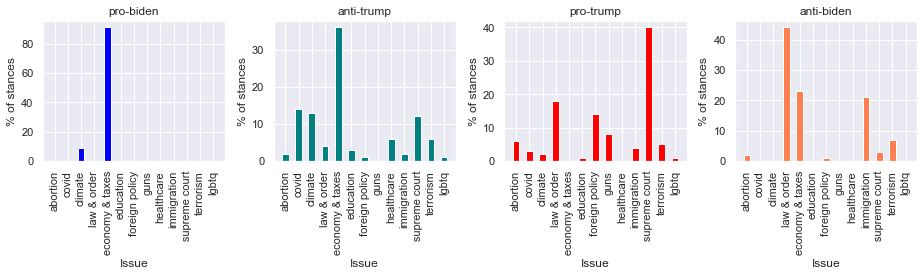

In [1287]:
## create contingency table

contingency = pd.crosstab(new_red2['pred_stance'], new_red2["pred_issue"])
#print(contingency)

##create row percentage for gender from gender contingency table
contingency1 = contingency.div(contingency.sum(axis=1), axis=0)
#print(contingency1)
contingency_per = (contingency1*100).round()
print(contingency_per)

names_pb = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_pb = [ contingency_per.loc[0][0], contingency_per.loc[0][1], contingency_per.loc[0][2], contingency_per.loc[0][3], contingency_per.loc[0][4], contingency_per.loc[0][5], contingency_per.loc[0][6], contingency_per.loc[0][7], contingency_per.loc[0][8], contingency_per.loc[0][9], contingency_per.loc[0][10], contingency_per.loc[0][11], contingency_per.loc[0][12]]
#plt.bar(names_pb, values_pb, color = 'green')

names_at = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_at = [ contingency_per.loc[3][0], contingency_per.loc[3][1], contingency_per.loc[3][2], contingency_per.loc[3][3], contingency_per.loc[3][4], contingency_per.loc[3][5], contingency_per.loc[3][6], contingency_per.loc[3][7], contingency_per.loc[3][8], contingency_per.loc[3][9], contingency_per.loc[3][10], contingency_per.loc[3][11], contingency_per.loc[3][12]]


names_pt = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_pt = [ contingency_per.loc[1][0], contingency_per.loc[1][1], contingency_per.loc[1][2], contingency_per.loc[1][3], contingency_per.loc[1][4], contingency_per.loc[1][5], contingency_per.loc[1][6], contingency_per.loc[1][7], contingency_per.loc[1][8], contingency_per.loc[1][9], contingency_per.loc[1][10], contingency_per.loc[1][11], contingency_per.loc[1][12]]


names_ab = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
values_ab = [ contingency_per.loc[2][0], contingency_per.loc[2][1], contingency_per.loc[2][2], contingency_per.loc[2][3], contingency_per.loc[2][4], contingency_per.loc[2][5], contingency_per.loc[2][6], contingency_per.loc[2][7], contingency_per.loc[2][8], contingency_per.loc[2][9], contingency_per.loc[2][10], contingency_per.loc[2][11], contingency_per.loc[2][12]]

plt.figure(figsize=(13,4))
plt.subplot(1, 4, 1)
plt.bar( names_pb, values_pb, color = 'blue', width = 0.5)
plt.title('pro-biden', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 2)
plt.bar( names_at, values_at, color = 'teal',  width = 0.5)
plt.title('anti-trump', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 3)
plt.bar( names_pt, values_pt, color = 'red',  width = 0.5)
plt.title('pro-trump', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 4, 4)
plt.bar( names_ab, values_ab, color = 'coral',  width = 0.5)
plt.title('anti-biden', fontsize=12)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('% of stances', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

#plt.savefig("image/stance_issue_per_ID.png", dpi=300, bbox_inches = "tight") 



In [476]:
###issue of 6 states
#new_df = swing.loc[predicted_fb_all['pred_issue'] == '4'] #economy
#new_df = swing.loc[predicted_fb_all['pred_issue'] == '10'] #supreme court

## Demographic analysis for whole data with stance and issue

In [863]:
# get distinct values of the dataframe based on column
distinct_ad = predicted_fb_all.drop_duplicates(subset = ["ad_creative_body"])
distinct_ad = distinct_ad.reset_index(drop=True)
distinct_ad

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para,avg_imp,avg_spend,date
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2,499.5,49.5,2020-09-23
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0,499.5,49.5,2020-09-23
3,364645051536385,Hey Wisconsin - Joe Biden’s anti-life agenda i...,Women Speak Out PAC,2020-11-03,2020-11-04,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.000292', 'age': '65+', 'gen...",2,0,0,12499.5,149.5,2020-11-03
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,2,42499.5,2249.5,2020-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35318,1063249584108238,The difference between Justice Kenny Griffis a...,Improve MS Political Action Committee,2020-10-26,2020-11-04,"{'lower_bound': '20000', 'upper_bound': '24999'}","{'lower_bound': '600', 'upper_bound': '699'}","[{'percentage': '9.3E-5', 'region': 'Iowa'}, {...","[{'percentage': '0.000378', 'age': '45-54', 'g...",2,10,1,22499.5,649.5,2020-10-26
35319,2763658733912774,I asked U.S. EPA Administrator Andrew Wheeler\...,LANCE GOODEN FOR CONGRESS COMMITTEE,2020-10-26,2020-10-29,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.000399', 'region': 'Alaska'...","[{'percentage': '0.001383', 'age': '35-44', 'g...",2,6,3,12499.5,149.5,2020-10-26
35320,4466907490050508,Joe Biden and Kamala Harris are LEADING in key...,Off the Sidelines,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.004415', 'region': 'Alaska'...","[{'percentage': '0.083885', 'age': '45-54', 'g...",3,10,0,499.5,49.5,2020-10-26
35321,357472945586944,There is still time to receive before the big ...,Adam Edward Ratliff,2020-10-26,2020-10-30,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.001003', 'region': 'Alaska'...","[{'percentage': '0.00011', 'age': '35-44', 'ge...",1,10,3,12499.5,149.5,2020-10-26


In [4]:
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 0)] #pro-biden
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 1)] #pro-trump
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 2)] #anti-biden
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 3)] #anti-trump

# new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 0) | (predicted_fb_all['pred_stance'] == 3)] #pro-biden, anti-trump
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 1) | (predicted_fb_all['pred_stance'] == 2)] #pro-trump, anti-biden

#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 0)] #pro-biden
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 1)] #pro-trump
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 2)] #anti-biden
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 3)] #anti-trump


In [5]:
new_df

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
18,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '30000', 'upper_bound': '34999'}","{'lower_bound': '2500', 'upper_bound': '2999'}","[{'percentage': '1', 'region': 'Arizona'}]","[{'percentage': '0.001029', 'age': '55-64', 'g...",0,8,0
31,364343544984893,Joe Biden knows what he's doing. He's helped g...,Win Justice,2020-11-03,2020-11-04,"{'lower_bound': '100000', 'upper_bound': '1249...","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.000471', 'age': '18-24', 'g...",0,6,0
75,344831829917667,Trump rejects science. Fight back at the ballo...,"LEAGUE OF CONSERVATION VOTERS, INC",2020-10-26,2020-11-03,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '300', 'upper_bound': '399'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001102', 'age': '45-54', 'g...",0,2,0
144,398566498184940,"URGENT: Election Day is Tuesday, November 3, a...",BIDEN FOR PRESIDENT,2020-11-01,2020-11-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.001651', 'age': '45-54', 'g...",0,4,0
184,4140735635953040,"URGENT: Election Day is Tuesday, November 3, a...",BIDEN FOR PRESIDENT,2020-11-01,2020-11-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.00074', 'age': '25-34', 'ge...",0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
852794,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0
852795,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0
852796,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0
852797,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0


## Demographic analysis for whole data with stance and issue

In [1137]:
avg_imp = []
avg_spend = []
for j in range (0, predicted_fb_all.shape[0] ):
    dic_imp = eval(predicted_fb_all['impressions'][j])
    dic_cost = eval(predicted_fb_all['spend'][j])
    dic_imp_new = dict([k, float(v)] for k, v in dic_imp.items()) 
    dic_cost_new = dict([k, float(v)] for k, v in dic_cost.items()) 
    #print(dic_imp_new) 
    imp = sum(dic_imp_new.values()) / len(dic_imp_new)
    avg_imp.append(imp) # avg of impression
    cost = sum(dic_cost_new.values()) / len(dic_cost_new)
    avg_spend.append(cost) # avg of spend

In [1095]:
predicted_fb_all['avg_imp'] = avg_imp
predicted_fb_all['avg_spend'] = avg_spend
predicted_fb_all['date']= pd.to_datetime(predicted_fb_all['ad_delivery_start_time']) #convert string to date-time

In [1096]:
predicted_fb_all

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para,avg_imp,avg_spend,date
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2,499.5,49.5,2020-09-23
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0,499.5,49.5,2020-09-23
3,653784258879707,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001443', 'age': '18-24', 'g...",3,2,2,1499.5,49.5,2020-09-23
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852794,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0,499.5,49.5,2020-10-26
852795,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0,499.5,49.5,2020-10-26
852796,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0,1499.5,49.5,2020-10-26
852797,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0,499.5,49.5,2020-10-26


In [1097]:
#eval(predicted_fb_all['demographic_distribution'][100]) #list

In [1098]:
#eval(predicted_fb_all['demographic_distribution'][100])[0]

In [1099]:
##### Demographic age
# - 13-17
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []
imp = []
reg = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['age'] == '18-24' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        
        elif dic['age'] == '65+' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        

In [1100]:
age_df = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age': age, 'avg_imp' : imp, 'region_distribution': reg,'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1101]:
age_df 

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
...,...,...,...,...,...,...,...,...
10028467,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2
10028468,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2
10028469,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2
10028470,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2


In [1102]:
# dfc = age_df.groupby(['age', 'pred_stance']).agg({'id': 'count'})
dfc = age_df.groupby(['pred_stance', 'age']).agg({'id': 'count'})
dfc

id
pred_stance age           
-1          18-24       25
            25-34       25
            35-44       25
            45-54       24
            55-64       21
            65+         21
 0          13-17      193
            18-24    45634
            25-34    54622
            35-44    60896
            45-54    60425
            55-64    59892
            65+      59673
 1          13-17      911
            18-24   681327
            25-34   871622
            35-44   947448
            45-54   996610
            55-64  1021365
            65+     998114
 2          13-17      363
            18-24   168706
            25-34   210444
            35-44   231740
            45-54   240216
            55-64   246941
            65+     243474
 3          13-17     2302
            18-24   377257
            25-34   475758
            35-44   505406
            45-54   497137
            55-64   490712
            65+     479143

In [1103]:
# gender_age_summary=age_df.groupby(['pred_stance','age']).agg(tot_stance=('id','count')).unstack()
# gender_age_summary.head()
# gender_age_summary.plot(kind='bar', figsize=(10,6), stacked=True);
# plt.title('Summary of stances by Gender & Age');
# plt.xlabel('Age');
# plt.ylabel('#Stances');

In [1104]:
##### Demographic gender
# demo_genders:
#   - male
#   - female
#   - unknown

# ad_id = []
# stance_p = []
# text = []
# fe = []
gender = []
# issue_p = []
impression = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        impression.append(dic['percentage'])
        if dic['gender'] == 'male' :
#             ad_id.append(predicted_fb_all.id[j])
#             text.append(predicted_fb_all.ad_creative_body[j])
#             fe.append(predicted_fb_all.funding_entity[j])
            gender.append(dic['gender'])

#             stance_p.append(predicted_fb_all.pred_stance[j])
#             issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['gender'] == 'female' :
#             ad_id.append(predicted_fb_all.id[j])
#             text.append(predicted_fb_all.ad_creative_body[j])
#             fe.append(predicted_fb_all.funding_entity[j])
            gender.append(dic['gender'])
#             stance_p.append(predicted_fb_all.pred_stance[j])
#             issue_p.append(predicted_fb_all.pred_issue[j])
        elif dic['gender'] == 'unknown' :
#             ad_id.append(predicted_fb_all.id[j])
#             text.append(predicted_fb_all.ad_creative_body[j])
#             fe.append(predicted_fb_all.funding_entity[j])
            gender.append(dic['gender'])
#             stance_p.append(predicted_fb_all.pred_stance[j])
#             issue_p.append(predicted_fb_all.pred_issue[j])
        

In [1105]:
gender_df = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender': gender, 'ag_imp':impression, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1106]:
age_df['gender'] = gender
age_df['ag_imp'] = impression

In [1107]:
age_df

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue,gender,ag_imp
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.508772
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.274854
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.017544
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.076023
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.05848
...,...,...,...,...,...,...,...,...,...,...
10028467,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.191011
10028468,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.087079
10028469,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.058989
10028470,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,unknown,0.002809


## stance vs demographic

In [1108]:
#drop "none" (-1) stance
new_age_df = age_df[age_df.pred_stance != -1]

In [1109]:
new_age_df.id.nunique() #852790

852790

In [1110]:
new_age_df

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue,gender,ag_imp
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.508772
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.274854
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.017544
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.076023
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.05848
...,...,...,...,...,...,...,...,...,...,...
10028467,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.191011
10028468,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.087079
10028469,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.058989
10028470,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,unknown,0.002809


In [1111]:
new_age_df['region_distribution']

0           [{'percentage': '1', 'region': 'Wisconsin'}]
1           [{'percentage': '1', 'region': 'Wisconsin'}]
2           [{'percentage': '1', 'region': 'Wisconsin'}]
3           [{'percentage': '1', 'region': 'Wisconsin'}]
4           [{'percentage': '1', 'region': 'Wisconsin'}]
                                ...                     
10028467        [{'percentage': '1', 'region': 'Texas'}]
10028468        [{'percentage': '1', 'region': 'Texas'}]
10028469        [{'percentage': '1', 'region': 'Texas'}]
10028470        [{'percentage': '1', 'region': 'Texas'}]
10028471        [{'percentage': '1', 'region': 'Texas'}]
Name: region_distribution, Length: 10028331, dtype: object

## chi-square test age and stance

In [646]:
####....age-gender-stance #

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female')]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female')]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female'))]

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female')]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female')]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female'))]


####....age-gender-stance-issue #

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female')) &  (new_age_df['pred_issue'] == 0)]

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female')) &  (new_age_df['pred_issue'] == 0)]


# ####....age-gender-stance-state #
# #older age (56+)
# ad_id = []
# text = []
# fe = []
# imp = []
# age = []
# ag_imp = []
# gender = []
# stance_p = []
# issue_p = []
# for j in range (0, new_age_df.shape[0] ):
#     list_dic = eval(new_age_df['region_distribution'][j])
#     #print (list_dic)
#     #sys.exit()
#     for i in range (0, len(list_dic)):
#         dic = list_dic[i]
#         if  dic['region'] == 'Pennsylvania': #'Pennsylvania': #we checked for Alabama(c), Florida(s) in the paper
#             ad_id.append(new_age_df.id[j])
#             text.append(new_age_df.ad_creative_body[j])
#             fe.append(new_age_df.funding_entity[j])
#             imp.append(new_age_df.avg_imp[j])
#             age.append(new_age_df.age[j])
#             ag_imp.append(new_age_df.ag_imp[j])
#             gender.append(new_age_df.gender[j])
#             stance_p.append(new_age_df.pred_stance[j])
#             issue_p.append(new_age_df.pred_issue[j])
            
# reg_chi = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 'age' : age,
#                         'gender': gender, 'ag_imp':impression, 'avg_imp':imp, 'pred_stance' : stance_p, 'pred_issue' : issue_p
#                         }) 

# chi_df = reg_chi.loc[((reg_chi['pred_stance'] == 1) | (reg_chi['pred_stance'] == 2) )  & ( (reg_chi['age'] == '55-64') | (reg_chi['age'] == '65+') ) &  ((reg_chi['gender'] == 'female')) ]


chi_df = new_age_df.pivot_table(values = 'id', index='pred_stance', columns='age', aggfunc='count')
chi_df



age,13-17,18-24,25-34,35-44,45-54,55-64,65+
pred_stance,,,,,,,
0,193,45634,54622,60896,60425,59892,59673
1,911,681327,871622,947448,996610,1021365,998114
2,363,168706,210444,231740,240216,246941,243474
3,2302,377257,475758,505406,497137,490712,479143


In [ ]:
# ## indexing for further analysis
# chi_idx = chi_df.index
# print(chi_idx)
# chi_df['age'] = chi_idx.values
# chi_df = chi_df.reset_index(drop=True) 
# print(chi_df)
# #new_chi_df = chi_df.rename({})

In [1258]:
contingency = pd.crosstab(new_age_df['pred_stance'], new_age_df["age"]) # all age group and all stances
contingency_gen = pd.crosstab(new_age_df['pred_stance'], new_age_df["gender"]) # all gender and all stances
#contingency = pd.crosstab(new_age_df['pred_stance'], new_age_df["gender"]) # all gender group and all stances
#contingency = pd.crosstab(chi_df['pred_stance'], chi_df["age"]) #multiple stances, multiple age group, female
contingency
#contingency_gen

age,13-17,18-24,25-34,35-44,45-54,55-64,65+
pred_stance,,,,,,,
0,193,45634,54622,60896,60425,59892,59673
1,911,681327,871622,947448,996610,1021365,998114
2,363,168706,210444,231740,240216,246941,243474
3,2302,377257,475758,505406,497137,490712,479143


In [1158]:
observed_values = contingency.values
observed_values


array([[    193,   45634,   54622,   60896,   60425,   59892,   59673],
       [    911,  681327,  871622,  947448,  996610, 1021365,  998114],
       [    363,  168706,  210444,  231740,  240216,  246941,  243474],
       [   2302,  377257,  475758,  505406,  497137,  490712,  479143]])

In [1159]:
import scipy.stats as stats
vals = stats.chi2_contingency(contingency)
vals

(8997.22105598447,
 0.0,
 18,
 array([[1.28285715e+02, 4.33266028e+04, 5.48829367e+04, 5.94113646e+04,
         6.10757092e+04, 6.19103662e+04, 6.05997348e+04],
        [2.07363212e+03, 7.00338577e+05, 8.87137124e+05, 9.60335403e+05,
         9.87238152e+05, 1.00072969e+06, 9.79544422e+05],
        [5.04327270e+02, 1.70329076e+05, 2.15760278e+05, 2.33562804e+05,
         2.40105811e+05, 2.43387083e+05, 2.38234622e+05],
        [1.06275489e+03, 3.58929745e+05, 4.54665661e+05, 4.92180429e+05,
         5.05968327e+05, 5.12882861e+05, 5.02025222e+05]]))

In [1160]:
alpha=0.05
dof = 1 #degree of freedom
critical_value = stats.chi2.ppf(q = 1-alpha, df = dof)
critical_value

3.841458820694124

#### drop age group "13-17"

In [1173]:
contingency = contingency.drop(columns=['13-17'])
contingency


age,18-24,25-34,35-44,45-54,55-64,65+
pred_stance,,,,,,
0,45634,54622,60896,60425,59892,59673
1,681327,871622,947448,996610,1021365,998114
2,168706,210444,231740,240216,246941,243474
3,377257,475758,505406,497137,490712,479143


### create row percentage for age from contingency table

age             18-24     25-34     35-44     45-54     55-64       65+
pred_stance                                                            
0            0.133768  0.160115  0.178506  0.177126  0.175563  0.174921
1            0.123507  0.158003  0.171748  0.180660  0.185148  0.180933
2            0.125757  0.156870  0.172744  0.179062  0.184075  0.181491
3            0.133523  0.168385  0.178879  0.175952  0.173678  0.169583
age          18-24  25-34  35-44  45-54  55-64   65+
pred_stance                                         
0             13.0   16.0   18.0   18.0   18.0  17.0
1             12.0   16.0   17.0   18.0   19.0  18.0
2             13.0   16.0   17.0   18.0   18.0  18.0
3             13.0   17.0   18.0   18.0   17.0  17.0
pred_stance     0     1     2     3
age                                
18-24        13.0  12.0  13.0  13.0
25-34        16.0  16.0  16.0  17.0
35-44        18.0  17.0  17.0  18.0
45-54        18.0  18.0  18.0  18.0
55-64        18.0  19.0  18.0  17.

<ipython-input-1174-7d014289e373>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


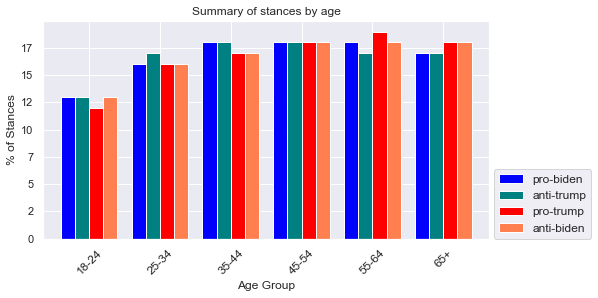

In [1174]:
# col0_sum = contingency['13-17'].values.sum()
# #print(col0_sum)
# col0_per = ((contingency['13-17'].values/col0_sum)*100).round()
# print(col0_per)

# col1_sum = contingency['18-24'].values.sum()
# col1_per = ((contingency['18-24'].values/col1_sum)*100).round()
# print(col1_per)

# col2_sum = contingency['25-34'].values.sum()
# col2_per = ((contingency['25-34'].values/col2_sum)*100).round()
# print(col2_per)


# col3_sum = contingency['35-44'].values.sum()
# #print(col3_sum)
# col3_per = ((contingency['35-44'].values/col3_sum)*100).round()
# print(col3_per)

# col4_sum = contingency['45-54'].values.sum()
# col4_per = ((contingency['45-54'].values/col4_sum)*100).round()
# print(col4_per)

# col5_sum = contingency['55-64'].values.sum()
# col5_per = ((contingency['55-64'].values/col5_sum)*100).round()
# print(col5_per)

# col6_sum = contingency['65+'].values.sum()
# col6_per = ((contingency['65+'].values/col6_sum)*100).round()
# print(col6_per, col6_per[0],  col6_per[1])


contingency_age_per = contingency.div(contingency.sum(axis=1), axis=0)
print(contingency_age_per)
contingency_age_per = (contingency_age_per*100).round()
print(contingency_age_per)

##transpose dtaframe
contingency_age_per_transpose = contingency_age_per.T
print(contingency_age_per_transpose)


## swap columns in dataframe
contingency_age_per_transpose = contingency_age_per_transpose[[0,3,1,2]]
contingency_age_per_transpose


g = contingency_age_per_transpose.plot(kind='bar', figsize=(8,4), width = 0.8, color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by age', fontsize=12);
plt.xlabel('Age Group', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.savefig("image/stance_age_per.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [1128]:
# plt.figure(figsize=(15,5))
# plt.subplot(1, 4, 1)
# plt.bar( names_pb, values_pb, color = 'green', width = 0.5)
# plt.title('pro-biden', fontsize=12)
# plt.xlabel('Age Group', fontsize=12)
# plt.xticks(rotation=45)

# plt.subplot(1, 4, 2)
# plt.bar( names_at, values_at, color = 'blue',  width = 0.5)
# plt.title('anti-trump', fontsize=12)
# plt.xlabel('Age Group', fontsize=12)
# plt.xticks(rotation=45)

# plt.subplot(1, 4, 3)
# plt.bar( names_pt, values_pt, color = 'red',  width = 0.5)
# plt.title('pro-trump', fontsize=12)
# plt.xlabel('Age Group', fontsize=12)
# plt.xticks(rotation=45)

# plt.subplot(1, 4, 4)
# plt.bar( names_ab, values_ab, color = 'orange',  width = 0.5)
# plt.title('anti-biden', fontsize=12)
# plt.xlabel('Age Group', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()

# #plt.savefig("image/stance_age_per.png", dpi=300, bbox_inches = "tight") 

### create row percentage for gender from gender contingency table

In [1259]:
contingency_gen

gender,female,male,unknown
pred_stance,,,
0,129771,127488,84076
1,2210042,2246289,1061066
2,527956,548100,265828
3,1088720,1065174,673821


gender         female      male   unknown
pred_stance                              
0            0.380187  0.373498  0.246315
1            0.400559  0.407128  0.192313
2            0.393444  0.408456  0.198101
3            0.385018  0.376691  0.238292
gender       female  male  unknown
pred_stance                       
0              38.0  37.0     25.0
1              40.0  41.0     19.0
2              39.0  41.0     20.0
3              39.0  38.0     24.0
pred_stance     0     1     2     3
gender                             
female       38.0  40.0  39.0  39.0
male         37.0  41.0  41.0  38.0
unknown      25.0  19.0  20.0  24.0


<ipython-input-1260-578f30b179f1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


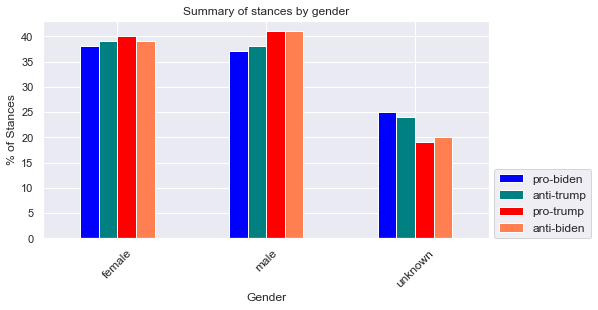

In [1260]:
contingency_gen_per = contingency_gen.div(contingency_gen.sum(axis=1), axis=0)
print(contingency_gen_per)
contingency_gen_per = (contingency_gen_per*100).round()
print(contingency_gen_per)

##transpose dtaframe
contingency_gen_per_transpose = contingency_gen_per.T
print(contingency_gen_per_transpose)


## swap columns in dataframe
contingency_gen_per_transpose = contingency_gen_per_transpose[[0,3,1,2]]
contingency_gen_per_transpose


g = contingency_gen_per_transpose.plot(kind='bar', figsize=(8,4), color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by gender', fontsize=12);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.savefig("image/stance_gen_per.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [777]:
col0_sum = contingency_gen['female'].values.sum()
print(col0_sum)
col0_per = ((contingency_gen['female'].values/col0_sum)*100).round()
print(col0_per)

col1_sum = contingency_gen['male'].values.sum()
col1_per = ((contingency_gen['male'].values/col1_sum)*100).round()
print(col1_per)

col2_sum = contingency_gen['unknown'].values.sum()
col2_per = ((contingency_gen['unknown'].values/col2_sum)*100).round()
print(col2_per)



3956489
[ 3. 56. 13. 28.]
[ 3. 56. 14. 27.]
[ 4. 51. 13. 32.]


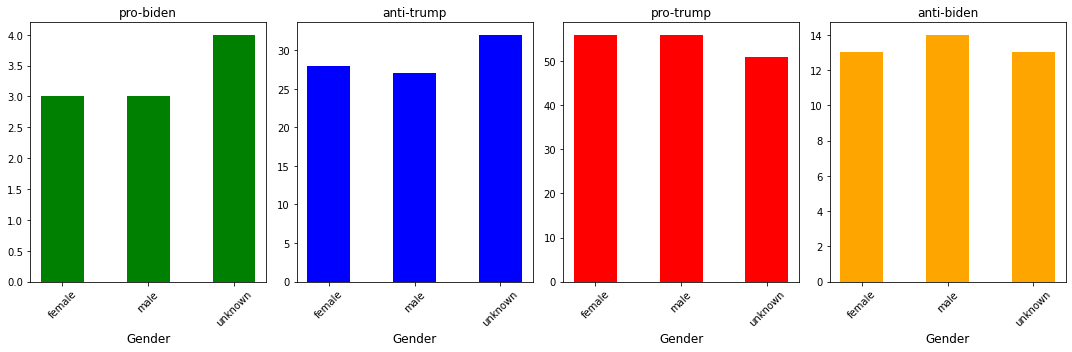

In [759]:
# plt.figure(figsize=(15,5))
# plt.subplot(1, 4, 1)
# plt.bar( names_gen_pb, values_gen_pb, color = 'green', width = 0.5)
# plt.title('pro-biden', fontsize=12)
# plt.xlabel('Gender', fontsize=12)
# plt.xticks(rotation=45)

# plt.subplot(1, 4, 2)
# plt.bar( names_gen_at, values_gen_at, color = 'blue',  width = 0.5)
# plt.title('anti-trump', fontsize=12)
# plt.xlabel('Gender', fontsize=12)
# plt.xticks(rotation=45)

# plt.subplot(1, 4, 3)
# plt.bar( names_gen_pt, values_gen_pt, color = 'red',  width = 0.5)
# plt.title('pro-trump', fontsize=12)
# plt.xlabel('Gender', fontsize=12)
# plt.xticks(rotation=45)

# plt.subplot(1, 4, 4)
# plt.bar( names_gen_ab, values_gen_ab, color = 'orange',  width = 0.5)
# plt.title('anti-biden', fontsize=12)
# plt.xlabel('Gender', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.savefig("image/stance_gen_per.png", dpi=300, bbox_inches = "tight") 

## issue vs demographic

In [114]:
#drop "none" (-1) issue
new_age_df = age_df[age_df.pred_issue != -1]
new_age_df = new_age_df.reset_index(drop=True)
new_age_df

,id,ad_creative_body,funding_entity,age,avg_imp,pred_stance,pred_issue,gender,ag_imp
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,3,2,female,0.508772
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,3,2,female,0.274854
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,3,2,male,0.017544
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,3,2,male,0.076023
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,3,2,male,0.05848
...,...,...,...,...,...,...,...,...,...
9485501,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,0,2,female,0.191011
9485502,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,0,2,female,0.087079
9485503,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,0,2,female,0.058989
9485504,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,0,2,unknown,0.002809


## impression vs demographic


### check pro-biden, pro-trump, anti-biden, anti-trump stance separately

In [300]:
#stance_imp_df = age_df.loc[(age_df['pred_stance'] == 0) | (age_df['pred_stance'] == 1) ]
stance_imp_df0 = age_df.loc[(age_df['pred_stance'] == 0)] #pro-biden , 341335
stance_imp_df1 = age_df.loc[(age_df['pred_stance'] == 1)] #pro-trump , 5517397
stance_imp_df2 = age_df.loc[(age_df['pred_stance'] == 2)] #anti-biden , 1341884
stance_imp_df3 = age_df.loc[(age_df['pred_stance'] == 3)] #anti-trump, 2827715, 10028331
stance_imp_df0 = stance_imp_df0.reset_index(drop=True)
stance_imp_df1 = stance_imp_df1.reset_index(drop=True)
stance_imp_df2 = stance_imp_df2.reset_index(drop=True)
stance_imp_df3 = stance_imp_df3.reset_index(drop=True)
#convert value of specific column of dataframe str to flot 
stance_imp_df0['ag_imp'] =  stance_imp_df0['ag_imp'].astype(float)
stance_imp_df1['ag_imp'] =  stance_imp_df1['ag_imp'].astype(float)
stance_imp_df2['ag_imp'] =  stance_imp_df2['ag_imp'].astype(float)
stance_imp_df3['ag_imp'] =  stance_imp_df3['ag_imp'].astype(float)
#stance_imp_df["ag_imp"] = 100 * stance_imp_df["ag_imp"]
stance_imp_df0["ag_imp"] = (stance_imp_df0["avg_imp"] * stance_imp_df0["ag_imp"])
stance_imp_df1["ag_imp"] = (stance_imp_df1["avg_imp"] * stance_imp_df1["ag_imp"])
stance_imp_df2["ag_imp"] = (stance_imp_df2["avg_imp"] * stance_imp_df2["ag_imp"])
stance_imp_df3["ag_imp"] = (stance_imp_df3["avg_imp"] * stance_imp_df3["ag_imp"])
#stance_imp_df

In [301]:
stance_imp_df0

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue,gender,ag_imp
0,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,55-64,32499.5,"[{'percentage': '1', 'region': 'Arizona'}]",0,8,unknown,33.441986
1,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,65+,32499.5,"[{'percentage': '1', 'region': 'Arizona'}]",0,8,unknown,37.471923
2,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,65+,32499.5,"[{'percentage': '1', 'region': 'Arizona'}]",0,8,male,1537.843840
3,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,55-64,32499.5,"[{'percentage': '1', 'region': 'Arizona'}]",0,8,male,2111.265019
4,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,55-64,32499.5,"[{'percentage': '1', 'region': 'Arizona'}]",0,8,female,4107.026814
...,...,...,...,...,...,...,...,...,...,...
341330,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,95.409994
341331,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,43.495961
341332,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,29.465006
341333,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,unknown,1.403095


In [302]:
stance_imp_df0 = stance_imp_df0[stance_imp_df0.age != '13-17']
stance_imp_df0 = stance_imp_df0[stance_imp_df0.gender != 'unknown']
#print(stance_imp_df0)
stance_imp_df1 = stance_imp_df1[stance_imp_df1.age != '13-17']
stance_imp_df1 = stance_imp_df1[stance_imp_df1.gender!= 'unknown']

stance_imp_df2 = stance_imp_df2[stance_imp_df2.age != '13-17']
stance_imp_df2 = stance_imp_df2[stance_imp_df2.gender != 'unknown']

stance_imp_df3 = stance_imp_df3[stance_imp_df3.age != '13-17']
stance_imp_df3 = stance_imp_df3[stance_imp_df3.gender != 'unknown']
# #group by age, gender based on sum of impression of age gender in pro-biden, anti trump ad
imp0 = stance_imp_df0.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()
imp1 = stance_imp_df1.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()
imp2 = stance_imp_df2.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()
imp3 = stance_imp_df3.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()

print(imp0, type(imp0), imp0.index, imp0. columns)


                     id                                   ad_creative_body  \
2       365500694665351  “The nation needs a candidate who can act with...   
3       365500694665351  “The nation needs a candidate who can act with...   
4       365500694665351  “The nation needs a candidate who can act with...   
5       365500694665351  “The nation needs a candidate who can act with...   
6       365500694665351  “The nation needs a candidate who can act with...   
...                 ...                                                ...   
341329  403567784005339  🗣 🗣 An important message from your union:\n\nH...   
341330  403567784005339  🗣 🗣 An important message from your union:\n\nH...   
341331  403567784005339  🗣 🗣 An important message from your union:\n\nH...   
341332  403567784005339  🗣 🗣 An important message from your union:\n\nH...   
341334  403567784005339  🗣 🗣 An important message from your union:\n\nH...   

             funding_entity    age  avg_imp  \
2       BIDEN FO

In [211]:
print(stance_imp_df0.ag_imp.sum()/1000000) # total impression = 11733.104273 M (11.7 B), total = 12492.9, 5.3, 41.6, 12.6,40.4
print(stance_imp_df1.ag_imp.sum()/1000000)
print(stance_imp_df2.ag_imp.sum()/1000000)
print(stance_imp_df3.ag_imp.sum()/1000000)
# pb = 669 M, pt = 5241 M, ab = 1585, at = 5099

663.8654471153885
5203.8899732716545
1575.073119578524
5050.025961901735


<ipython-input-208-5beb744dc7ef>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


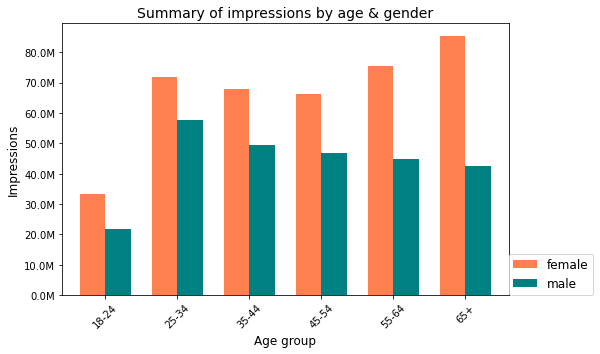

In [208]:
#imp.plot.barh()
g = imp0.plot(kind='bar', figsize=(8,5), width = 0.7, color=['coral', 'teal']);
plt.title('Summary of impressions by age & gender', fontsize=14);
plt.ylabel('Impressions', fontsize=12);
plt.xlabel('Age group', fontsize=12);
ylabels = ['{}'.format(y) + 'M' for y in g.get_yticks()/1000000]
newnames = ['female', 'male' ]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45)
g.legend(newnames,loc=(1,0), fontsize=12)
#plt.savefig("image/age_gender_impression_pro_biden.png", dpi=300, bbox_inches = "tight") 
#plt.savefig("image/age_gender_impression_pro_trump.png", dpi=300, bbox_inches = "tight") 
#plt.savefig("image/age_gender_impression_anti_biden.png", dpi=300, bbox_inches = "tight") 
#plt.savefig("image/age_gender_impression_anti_trump.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [223]:
imp0.ag_imp.female.values

array([33440710.18682276, 71990349.019475  , 67975635.07055692,
       66370243.2217213 , 75500635.91624326, 85251974.30014266])

## plot 4 figs together

In [303]:
# X = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
# X_axis = np.arange(len(X))
# plt.figure(figsize=(18,5))
# plt.subplot(1, 4, 1)
# plt.bar( X_axis - 0.2, imp0.ag_imp.female.values, color = 'coral', width = 0.4)
# plt.bar( X_axis + 0.2, imp0.ag_imp.male.values, color = 'teal', width = 0.4)
# plt.title('pro-biden', fontsize=14)
# plt.ylabel('Impressions', fontsize=12)
# plt.xlabel('Age group', fontsize=12)
# #ylabels = ['{}'.format(y) + 'M' for y in g0.get_yticks()/1000000]
# #newnames = ['female', 'male' ]
# #g0.set_yticklabels(ylabels)
# plt.xticks(X_axis,X,rotation=45)
# #g0.legend(newnames,loc=(1,0), fontsize=12)


# plt.subplot(1, 4, 2)
# plt.bar( X_axis - 0.2, imp3.ag_imp.female.values, color = 'coral', width = 0.4)
# plt.bar( X_axis + 0.2, imp3.ag_imp.male.values, color = 'teal', width = 0.4)
# plt.title('anti-trump', fontsize=14)
# plt.ylabel('Impressions', fontsize=12)
# plt.xlabel('Age group', fontsize=12)
# #ylabels = ['{}'.format(y) + 'M' for y in g0.get_yticks()/1000000]
# #newnames = ['female', 'male' ]
# #g0.set_yticklabels(ylabels)
# plt.xticks(X_axis,X,rotation=45)
# #g0.legend(newnames,loc=(1,0), fontsize=12)


# plt.subplot(1, 4, 3)
# plt.bar( X_axis - 0.2, imp1.ag_imp.female.values, color = 'coral', width = 0.4)
# plt.bar( X_axis + 0.2, imp1.ag_imp.male.values, color = 'teal', width = 0.4)
# plt.title('pro-trump', fontsize=14)
# plt.ylabel('Impressions', fontsize=12)
# plt.xlabel('Age group', fontsize=12)
# #ylabels = ['{}'.format(y) + 'M' for y in g0.get_yticks()/1000000]
# #newnames = ['female', 'male' ]
# #g0.set_yticklabels(ylabels)
# plt.xticks(X_axis,X,rotation=45)
# #g0.legend(newnames,loc=(1,0), fontsize=12)

# plt.subplot(1, 4, 4)
# plt.bar( X_axis - 0.2, imp2.ag_imp.female.values, color = 'coral', width = 0.4)
# plt.bar( X_axis + 0.2, imp2.ag_imp.male.values, color = 'teal', width = 0.4)
# plt.title('anti-biden', fontsize=14)
# plt.ylabel('Impressions', fontsize=12)
# plt.xlabel('Age group', fontsize=12)
# #ylabels = ['{}'.format(y) + 'M' for y in g0.get_yticks()/1000000]
# #newnames = ['female', 'male' ]
# #g0.set_yticklabels(ylabels)
# plt.xticks(X_axis,X,rotation=45)
# #g0.legend(newnames,loc=(1,0), fontsize=12)

# #newnames = ['female', 'male' ]
# #plt.legend(newnames,loc=(1), fontsize=12)
# plt.gca().get_legend_handles_labels()
# plt.tight_layout()

# #plt.savefig("image/age_gender_impression_stances.png", dpi=300, bbox_inches = "tight") 

<ipython-input-299-39f94454ed86>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
<ipython-input-299-39f94454ed86>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)
<ipython-input-299-39f94454ed86>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ylabels)
<ipython-input-299-39f94454ed86>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ylabels)
<ipython-input-299-39f94454ed86>:56: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4], labels=legends, bbox_to_anchor=(.5, -.05), loc='lower center', borderaxespad=0)


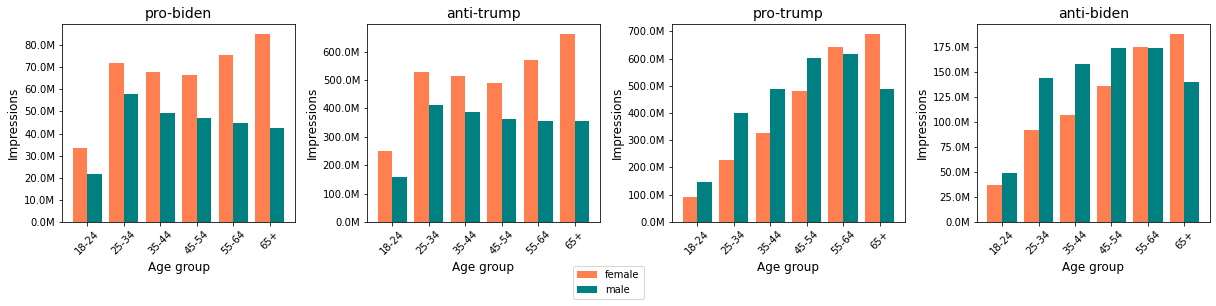

In [299]:
X = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
X_axis = np.arange(len(X))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17, 4))
                               
l1 = ax1.bar( X_axis - 0.2, imp0.ag_imp.female.values, color = 'coral', width = 0.4)
l1 = ax1.bar( X_axis + 0.2, imp0.ag_imp.male.values, color = 'teal', width = 0.4)
ax1.set_title('pro-biden', fontsize=14)
ax1.set_ylabel('Impressions', fontsize=12)
ax1.set_xlabel('Age group', fontsize=12)
ylabels = ['{}'.format(y) + 'M' for y in ax1.get_yticks()/1000000]
ax1.set_yticklabels(ylabels)
ax1.set_xticks(X_axis)
ax1.set_xticklabels(X)
ax1.xaxis.set_tick_params(which='both', rotation=45)


l2 = ax2.bar( X_axis - 0.2, imp3.ag_imp.female.values, color = 'coral', width = 0.4)
l2 = ax2.bar( X_axis + 0.2, imp3.ag_imp.male.values, color = 'teal', width = 0.4)
ax2.set_title('anti-trump', fontsize=14)
ax2.set_ylabel('Impressions', fontsize=12)
ax2.set_xlabel('Age group', fontsize=12)
ylabels = ['{}'.format(y) + 'M' for y in ax2.get_yticks()/1000000]
ax2.set_yticklabels(ylabels)
ax2.set_xticks(X_axis)
ax2.set_xticklabels(X)
ax2.xaxis.set_tick_params(which='both', rotation=45)

l3 = ax3.bar( X_axis - 0.2, imp1.ag_imp.female.values, color = 'coral', width = 0.4)
l3 = ax3.bar( X_axis + 0.2, imp1.ag_imp.male.values, color = 'teal', width = 0.4)
ax3.set_title('pro-trump', fontsize=14)
ax3.set_ylabel('Impressions', fontsize=12)
ax3.set_xlabel('Age group', fontsize=12)
ylabels = ['{}'.format(y) + 'M' for y in ax3.get_yticks()/1000000]
ax3.set_yticklabels(ylabels)
ax3.set_xticks(X_axis)
ax3.set_xticklabels(X)
ax3.xaxis.set_tick_params(which='both', rotation=45)



l4 = ax4.bar( X_axis - 0.2, imp2.ag_imp.female.values, color = 'coral', width = 0.4)
l4 = ax4.bar( X_axis + 0.2, imp2.ag_imp.male.values, color = 'teal', width = 0.4)
ax4.set_title('anti-biden', fontsize=14)
ax4.set_ylabel('Impressions', fontsize=12)
ax4.set_xlabel('Age group', fontsize=12)
ylabels = ['{}'.format(y) + 'M' for y in ax4.get_yticks()/1000000]
ax4.set_yticklabels(ylabels)
ax4.set_xticks(X_axis)
ax4.set_xticklabels(X)
ax4.xaxis.set_tick_params(which='both', rotation=45)


legends = ['female', 'male' ]
#plt.legend(newnames,loc=(1), fontsize=12)
#fig.legend([l1, l2, l3, l4], labels=legends, loc="lower center", fontsize=12)
fig.legend([l1, l2, l3, l4], labels=legends, bbox_to_anchor=(.5, -.05), loc='lower center', borderaxespad=0)
plt.tight_layout()

plt.savefig("image/age_gender_impression_stances.png", dpi=300, bbox_inches = "tight") 

## age_gender vs impression T-Test

In [168]:
#gen_imp = pd.crosstab(stance_imp_df['ag_imp'], stance_imp_df["gender"]) # all age group and all stances


# grp_temp = temp.pivot_table('avg_imp', index='date', columns='pred_stance', aggfunc='sum')
# grp_temp

gen_imp = stance_imp_df.pivot_table('ag_imp', index=['id'], columns=['gender'], aggfunc='sum')
age_imp = stance_imp_df.pivot_table('ag_imp', index=['id'], columns=['age'], aggfunc='sum')

In [169]:

#replace nan with 0 in pandas
gen_imp = gen_imp.fillna(0)
gen_imp

gender,female,male,unknown
id,,,
106852544102929,112.310077,379.336784,7.853638
107003710742494,0.000000,499.500000,0.000000
108082753955523,244.277547,1242.532184,12.688769
111977580184459,92.374033,401.994603,5.131863
112016620241468,186.690123,307.001192,5.808186
...,...,...,...
5776760155699173,140.682177,354.075570,4.742253
6045732465444213,906.233321,584.836489,8.427190
6203793623058238,2275.017951,1214.896919,9.585130


In [170]:

#replace nan with 0 in pandas
age_imp = age_imp.fillna(0)
age_imp

age,18-24,25-34,35-44,45-54,55-64,65+
id,,,,,,
106852544102929,26.702770,51.835113,41.625333,97.387015,150.006843,131.943424
107003710742494,62.437500,0.000000,0.000000,124.875000,124.875000,187.312500
108082753955523,81.425849,114.206418,254.852021,395.496124,388.093093,265.424996
111977580184459,11.974514,20.527452,32.501965,126.585787,169.350979,138.559801
112016620241468,2.489008,9.126864,29.040430,93.760146,188.349462,176.733589
...,...,...,...,...,...,...
5776760155699173,9.484006,17.388095,66.389044,113.810076,151.747101,140.681678
6045732465444213,44.257743,89.569634,173.870024,307.697400,474.191384,409.910818
6203793623058238,362.961141,3136.538859,0.000000,0.000000,0.000000,0.000000


In [171]:
age1 = age_imp['18-24'].values
age2 = age_imp['25-34'].values
age3 = age_imp['35-44'].values
age4 = age_imp['45-54'].values
age5 = age_imp['55-64'].values
age6 = age_imp['65+'].values


In [307]:
# female = gen_imp.female.values 
# male = gen_imp.male.values
# female = imp0.ag_imp.female.values 
# male = imp0.ag_imp.male.values
#unknown = imp.ag_imp.unknown.values

# female = ((gen_imp.female.values)/(gen_imp.female.values).sum()) * 100
# male = ((gen_imp.male.values)/(gen_imp.male.values).sum()) * 100
# unknown = gen_imp.unknown.values
#print(len(female), len(male), len(unknown), female[:10] )

# # Calculate the average
# female_mean = np.mean(imp.ag_imp.female)
# male_mean = np.mean(imp.ag_imp.male)
# unk_mean = np.mean(imp.ag_imp.unknown)
# print(female_mean, male_mean, unk_mean)
# # Calculate the standard deviation
# female_std = np.std(imp.ag_imp.female)
# male_std = np.std(imp.ag_imp.male)
# unk_std = np.std(imp.ag_imp.unknown)
# print(female_std, male_std, unk_std)


# # Calculate the average
# female_mean = np.mean(female)
# male_mean = np.mean(male)
# unk_mean = np.mean(unknown)
# print(female_mean, male_mean, unk_mean)
# # Calculate the standard deviation
# female_std = np.std(female)
# male_std = np.std(male)
# unk_std = np.std(unknown)
# print(female_std, male_std, unk_std)

# print(np.min(female), np.max(female), np.median(female))
# print(np.min(male), np.max(male), np.median(male))
# print(np.min(unknown), np.max(unknown), np.median(unknown))

## Paired T-Test age_gender

In [1255]:
from scipy import stats


female = imp0.ag_imp.female.values 
male = imp0.ag_imp.male.values

t_value,p_value=stats.ttest_rel(female,male)

#t_value,p_value=stats.ttest_rel(male[0:4], female[0:4]) #younger(18-54)

#t_value,p_value=stats.ttest_rel(female[4:6], male[4:6]) #older(55-65+)


print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is 4.767775
p-value for two tailed test is 0.005025


## State-wise Issue and Demographics

### Swing state - PA, age distribution

In [705]:
# ### age PA

# ##### Demographic age
# #   - 18-24
# #   - 25-34
# #   - 35-44
# #   - 45-54
# #   - 55-64
# #   - 65+

# ad_id = []
# stance_p = []
# text = []
# fe = []
# age = []
# issue_p = []

# for j in range (0, swing.shape[0] ):
#     list_dic = eval(swing['demographic_distribution'][j])
#     for i in range (0, len(list_dic)):
#         #print(list_dic[i])  
#         dic = list_dic[i]
#         #print(dic['age'] )
#         #sys.exit()
#         if dic['age'] == '13-17' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
#         elif dic['age'] == '18-24' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
#         elif dic['age'] == '25-34' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
        
#         elif dic['age'] == '35-44' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
            
#         elif dic['age'] == '45-54' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
        
#         elif dic['age'] == '55-64' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
        
#         elif dic['age'] == '65+' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
        

In [1163]:

### age PA

##### Demographic age
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, top_swing.shape[0] ):
    list_dic = eval(top_swing['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['age'] == '18-24' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        
        elif dic['age'] == '65+' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        

In [1164]:
age_swing = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1165]:
new_age_swing = age_swing[age_swing.pred_stance != -1]
new_age_swing = new_age_swing.reset_index(drop=True)
new_age_swing

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2
1,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2
2,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2
3,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2
4,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2
...,...,...,...,...,...,...
1177883,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,55-64,3,6
1177884,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,55-64,3,6
1177885,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,65+,3,6
1177886,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,65+,3,6


In [1166]:
dfc = new_age_swing.groupby(['age_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                      
pred_stance           0       1      2      3
age_distribution                             
13-17                15      56     22    194
18-24              8881   90471  17982  42587
25-34             10032  112618  22408  48987
35-44             10048  118773  24337  49724
45-54              9705  125053  24816  46827
55-64              9486  128308  25999  45508
65+                9515  125016  25921  44599

In [1167]:
new_age_swing.id.nunique() #102439

102439

age_distribution  13-17  18-24   25-34   35-44   45-54   55-64     65+
pred_stance                                                           
0                    15   8881   10032   10048    9705    9486    9515
1                    56  90471  112618  118773  125053  128308  125016
2                    22  17982   22408   24337   24816   25999   25921
3                   194  42587   48987   49724   46827   45508   44599
age_distribution  18-24   25-34   35-44   45-54   55-64     65+
pred_stance                                                    
0                  8881   10032   10048    9705    9486    9515
1                 90471  112618  118773  125053  128308  125016
2                 17982   22408   24337   24816   25999   25921
3                 42587   48987   49724   46827   45508   44599
age_distribution     18-24     25-34     35-44     45-54     55-64       65+
pred_stance                                                                 
0                 0.154005  0.173964

<ipython-input-1175-0bc9904584e8>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


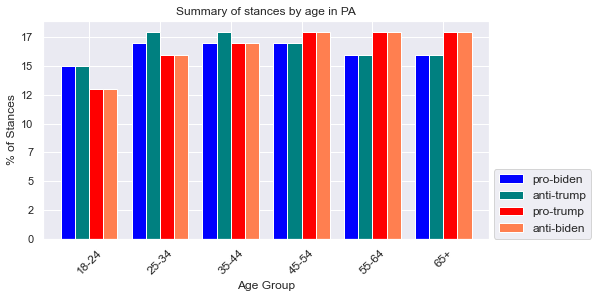

In [1175]:
## create contingency table
contingency = pd.crosstab(new_age_swing['pred_stance'], new_age_swing["age_distribution"]) # all age group and all stances
print(contingency)

## drop age group "13-17"
contingency = contingency.drop(columns=['13-17'])
print(contingency)

##create row percentage for gender from gender contingency table

contingency_age_per = contingency.div(contingency.sum(axis=1), axis=0)
print(contingency_age_per)
contingency_age_per = (contingency_age_per*100).round()
print(contingency_age_per)

##transpose dtaframe
contingency_age_per_transpose = contingency_age_per.T
print(contingency_age_per_transpose)


## swap columns in dataframe
contingency_age_per_transpose = contingency_age_per_transpose[[0,3,1,2]]
contingency_age_per_transpose


g = contingency_age_per_transpose.plot(kind='bar', figsize=(8,4), width = 0.8, color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by age in PA', fontsize=12);
plt.xlabel('Age Group', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.savefig("image/stance_age_per_PA.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Blue state - NY, age distribution

In [1176]:
### age NY

##### Demographic age
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, top_blue.shape[0] ):
    list_dic = eval(top_blue['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['age'] == '18-24' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        
        elif dic['age'] == '35-44' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
            
        elif dic['age'] == '45-54' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        
        elif dic['age'] == '55-64' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        
        elif dic['age'] == '65+' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        

In [1177]:
age_blue = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1178]:
new_age_blue = age_blue[age_blue.pred_stance != -1]
new_age_blue = new_age_blue.reset_index(drop=True)
new_age_blue

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue
0,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,55-64,3,4
1,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,35-44,3,4
2,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,45-54,3,4
3,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,25-34,3,4
4,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,55-64,3,4
...,...,...,...,...,...,...
488177,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,18-24,0,10
488178,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10
488179,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,55-64,0,10
488180,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10


In [1179]:
dfc = new_age_blue.groupby(['age_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                    
pred_stance          0      1     2      3
age_distribution                          
13-17               28     54    18    256
18-24             4314  15699  2458  34687
25-34             5760  21872  3680  47113
35-44             6173  24339  4570  48938
45-54             6081  27099  5059  49431
55-64             6034  28604  5356  50013
65+               6185  27899  5185  51277

In [1180]:
new_age_blue.id.nunique() #44586

44586

age_distribution  13-17  18-24  25-34  35-44  45-54  55-64    65+
pred_stance                                                      
0                    28   4314   5760   6173   6081   6034   6185
1                    54  15699  21872  24339  27099  28604  27899
2                    18   2458   3680   4570   5059   5356   5185
3                   256  34687  47113  48938  49431  50013  51277
age_distribution  18-24  25-34  35-44  45-54  55-64    65+
pred_stance                                               
0                  4314   5760   6173   6081   6034   6185
1                 15699  21872  24339  27099  28604  27899
2                  2458   3680   4570   5059   5356   5185
3                 34687  47113  48938  49431  50013  51277
age_distribution     18-24     25-34     35-44     45-54     55-64       65+
pred_stance                                                                 
0                 0.124873  0.166729  0.178684  0.176021  0.174661  0.179031
1                 0

<ipython-input-1187-6411f3318552>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


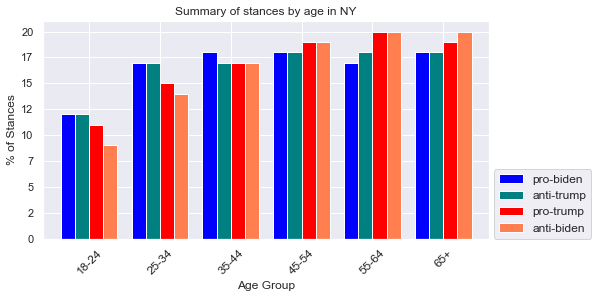

In [1187]:
## create contingency table
contingency = pd.crosstab(new_age_blue['pred_stance'], new_age_blue["age_distribution"]) # all age group and all stances
print(contingency)

## drop age group "13-17"
contingency = contingency.drop(columns=['13-17'])
print(contingency)

##create row percentage for gender from gender contingency table

contingency_age_per = contingency.div(contingency.sum(axis=1), axis=0)
print(contingency_age_per)
contingency_age_per = (contingency_age_per*100).round()
print(contingency_age_per)

##transpose dtaframe
contingency_age_per_transpose = contingency_age_per.T
print(contingency_age_per_transpose)


## swap columns in dataframe
contingency_age_per_transpose = contingency_age_per_transpose[[0,3,1,2]]
contingency_age_per_transpose


g = contingency_age_per_transpose.plot(kind='bar', figsize=(8,4), width = 0.8, color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by age in NY', fontsize=12);
plt.xlabel('Age Group', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.savefig("image/stance_age_per_NY.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Red state - ID, age distribution

In [1188]:
### age Idaho

##### Demographic age
# - 13-17
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, top_red.shape[0] ):
    list_dic = eval(top_red['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['age'] == '13-17' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        elif dic['age'] == '18-24' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        
        elif dic['age'] == '65+' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        

In [1189]:
age_red = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1190]:
new_age_red = age_red[age_red.pred_stance != -1]
new_age_red = new_age_red.reset_index(drop=True)
new_age_red

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue
0,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,65+,2,3
1,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,65+,2,3
2,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,45-54,2,3
3,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,55-64,2,3
4,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,55-64,2,3
...,...,...,...,...,...,...
6882,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,35-44,0,2
6883,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,65+,0,2
6884,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,55-64,0,2
6885,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,45-54,0,2


In [1191]:
dfc = new_age_red.groupby(['age_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

# # #group by age, gender based on sum of impression of age gender in pro-biden, anti trump ad
# imp = stance_imp_df.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()
# print(imp)

id                      
pred_stance          0       1      2      3
age_distribution                            
13-17              NaN     2.0    NaN    NaN
18-24              1.0   378.0   14.0   72.0
25-34              3.0   602.0   52.0  126.0
35-44              7.0   772.0  100.0  142.0
45-54              9.0  1014.0  152.0  140.0
55-64             15.0  1224.0  192.0  204.0
65+               12.0  1214.0  183.0  257.0

In [1192]:
new_age_red.id.nunique() #1406

1406

age_distribution  13-17  18-24  25-34  35-44  45-54  55-64   65+
pred_stance                                                     
0                     0      1      3      7      9     15    12
1                     2    378    602    772   1014   1224  1214
2                     0     14     52    100    152    192   183
3                     0     72    126    142    140    204   257
age_distribution  18-24  25-34  35-44  45-54  55-64   65+
pred_stance                                              
0                     1      3      7      9     15    12
1                   378    602    772   1014   1224  1214
2                    14     52    100    152    192   183
3                    72    126    142    140    204   257
age_distribution     18-24     25-34     35-44     45-54     55-64       65+
pred_stance                                                                 
0                 0.021277  0.063830  0.148936  0.191489  0.319149  0.255319
1                 0.072636  0.1

<ipython-input-1194-9ffd88a8dc88>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


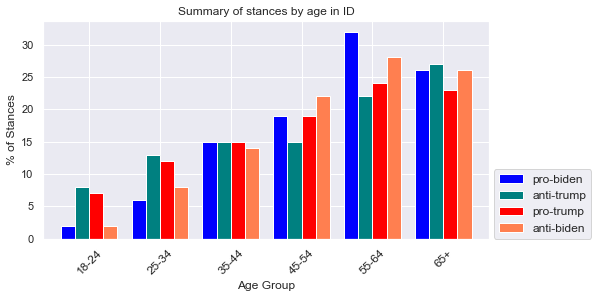

In [1194]:
## create contingency table
contingency = pd.crosstab(new_age_red['pred_stance'], new_age_red["age_distribution"]) # all age group and all stances
print(contingency)

## drop age group "13-17"
contingency = contingency.drop(columns=['13-17'])
print(contingency)

##create row percentage for gender from gender contingency table

contingency_age_per = contingency.div(contingency.sum(axis=1), axis=0)
print(contingency_age_per)
contingency_age_per = (contingency_age_per*100).round()
print(contingency_age_per)

##transpose dtaframe
contingency_age_per_transpose = contingency_age_per.T
print(contingency_age_per_transpose)


## swap columns in dataframe
contingency_age_per_transpose = contingency_age_per_transpose[[0,3,1,2]]
contingency_age_per_transpose


g = contingency_age_per_transpose.plot(kind='bar', figsize=(8,4), width = 0.8, color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by age in ID', fontsize=12);
plt.xlabel('Age Group', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.savefig("image/stance_age_per_ID.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Swing state - PA, gender distribution

In [1195]:
##### Demographic gender #PA
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, top_swing.shape[0] ):
    list_dic = eval(top_swing['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['gender'] == 'unknown' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
        

In [1196]:
swing_gender = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1197]:
new_swing_gender = swing_gender[swing_gender.pred_stance != -1]
new_swing_gender = new_swing_gender.reset_index(drop=True)
new_swing_gender

,id,ad_creative_body,funding_entity,gender_distribution,pred_stance,pred_issue
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,unknown,3,2
1,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,unknown,3,2
2,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,female,3,2
3,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,female,3,2
4,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,male,3,2
...,...,...,...,...,...,...
1177883,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,female,3,6
1177884,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,male,3,6
1177885,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,male,3,6
1177886,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,female,3,6


In [1198]:
dfc = new_swing_gender.groupby(['gender_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                       
pred_stance              0       1      2       3
gender_distribution                              
female               22246  284299  55690  107878
male                 21691  288271  58941  104967
unknown              13745  127725  26854   65581

In [1199]:
new_swing_gender.id.nunique() #102439

102439

gender_distribution  female    male  unknown
pred_stance                                 
0                     22246   21691    13745
1                    284299  288271   127725
2                     55690   58941    26854
3                    107878  104967    65581
gender_distribution    female      male   unknown
pred_stance                                      
0                    0.385666  0.376045  0.238289
1                    0.405970  0.411642  0.182387
2                    0.393611  0.416588  0.189801
3                    0.387457  0.377001  0.235542
gender_distribution  female  male  unknown
pred_stance                               
0                      39.0  38.0     24.0
1                      41.0  41.0     18.0
2                      39.0  42.0     19.0
3                      39.0  38.0     24.0
pred_stance             0     1     2     3
gender_distribution                        
female               39.0  41.0  39.0  39.0
male                 38.0  41.0  42.0  3

<ipython-input-1206-37580372b3b0>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


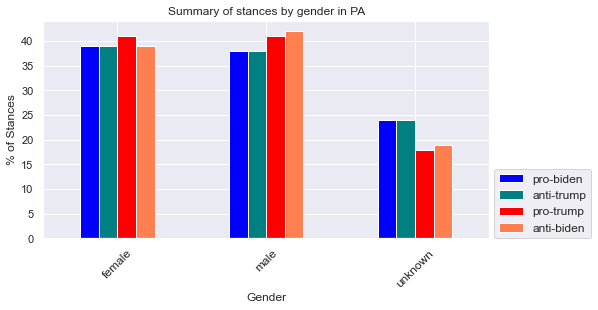

In [1206]:

contingency_gen = pd.crosstab(new_swing_gender['pred_stance'], new_swing_gender["gender_distribution"]) # all age group and all stances
print(contingency_gen)

##create row percentage for gender from gender contingency table

contingency_gen1 = contingency_gen.div(contingency_gen.sum(axis=1), axis=0)
print(contingency_gen1)
contingency_gen_per = (contingency_gen1*100).round()
print(contingency_gen_per)

##transpose dtaframe

contingency_gen_per_transpose = contingency_gen_per.T
print(contingency_gen_per_transpose)

## swap columns in dataframe
contingency_gen_per_transpose = contingency_gen_per_transpose[[0,3,1,2]]
contingency_gen_per_transpose

g = contingency_gen_per_transpose.plot(kind='bar', figsize=(8,4), color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by gender in PA', fontsize=12);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
#plt.savefig("image/stance_gen_per_PA.png", dpi=300, bbox_inches = "tight") 
plt.show()


### Blue state - NY, gender distribution

In [1201]:
##### Demographic gender #NY
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, top_blue.shape[0] ):
    list_dic = eval(top_blue['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['gender'] == 'unknown' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
        

In [1202]:
blue_gender = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1203]:
new_blue_gender = blue_gender[blue_gender.pred_stance != -1]
new_blue_gender = new_blue_gender.reset_index(drop=True)
new_blue_gender

,id,ad_creative_body,funding_entity,gender_distribution,pred_stance,pred_issue
0,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,unknown,3,4
1,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,female,3,4
2,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,unknown,3,4
3,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,unknown,3,4
4,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,male,3,4
...,...,...,...,...,...,...
488177,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,male,0,10
488178,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,female,0,10
488179,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,male,0,10
488180,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,female,0,10


In [1204]:
dfc = new_blue_gender.groupby(['gender_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                      
pred_stance              0      1      2       3
gender_distribution                             
female               13282  61403  10990  109852
male                 13046  67196  12340  107233
unknown               8247  16967   2996   64630

In [1205]:
new_blue_gender.id.nunique() #44586

44586

gender_distribution  female    male  unknown
pred_stance                                 
0                     13282   13046     8247
1                     61403   67196    16967
2                     10990   12340     2996
3                    109852  107233    64630
gender_distribution    female      male   unknown
pred_stance                                      
0                    0.384150  0.377325  0.238525
1                    0.421822  0.461619  0.116559
2                    0.417458  0.468738  0.113804
3                    0.389940  0.380644  0.229416
gender_distribution  female  male  unknown
pred_stance                               
0                      38.0  38.0     24.0
1                      42.0  46.0     12.0
2                      42.0  47.0     11.0
3                      39.0  38.0     23.0
pred_stance             0     1     2     3
gender_distribution                        
female               38.0  42.0  42.0  39.0
male                 38.0  46.0  47.0  3

<ipython-input-1207-36f7134fc400>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


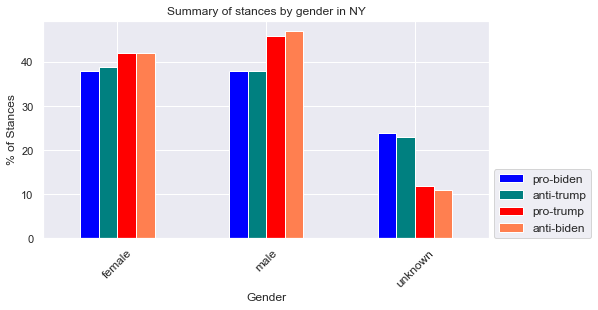

In [1207]:

contingency_gen = pd.crosstab(new_blue_gender['pred_stance'], new_blue_gender["gender_distribution"]) # all age group and all stances
print(contingency_gen)

##create row percentage for gender from gender contingency table

contingency_gen1 = contingency_gen.div(contingency_gen.sum(axis=1), axis=0)
print(contingency_gen1)
contingency_gen_per = (contingency_gen1*100).round()
print(contingency_gen_per)

##transpose dtaframe

contingency_gen_per_transpose = contingency_gen_per.T
print(contingency_gen_per_transpose)

## swap columns in dataframe
contingency_gen_per_transpose = contingency_gen_per_transpose[[0,3,1,2]]
contingency_gen_per_transpose

g = contingency_gen_per_transpose.plot(kind='bar', figsize=(8,4), color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by gender in NY', fontsize=12);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
#plt.savefig("image/stance_gen_per_NY.png", dpi=300, bbox_inches = "tight") 
plt.show()


### Red state - ID, gender distribution

In [1208]:
##### Demographic gender #ID
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, top_red.shape[0] ):
    list_dic = eval(top_red['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        elif dic['gender'] == 'unknown' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        

In [1209]:
red_gender = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1210]:
new_red_gender = red_gender[red_gender.pred_stance != -1]
new_red_gender = new_red_gender.reset_index(drop=True)
new_red_gender

,id,ad_creative_body,funding_entity,gender_distribution,pred_stance,pred_issue
0,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,female,2,3
1,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,male,2,3
2,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,male,2,3
3,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,female,2,3
4,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,male,2,3
...,...,...,...,...,...,...
6882,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,female,0,2
6883,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,female,0,2
6884,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,male,0,2
6885,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,female,0,2


In [1211]:
dfc = new_red_gender.groupby(['gender_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                      
pred_stance             0       1      2      3
gender_distribution                            
female               28.0  2232.0  286.0  506.0
male                 19.0  2548.0  385.0  383.0
unknown               NaN   426.0   22.0   52.0

In [1212]:
new_red_gender.id.nunique() #1406

1406

gender_distribution  female  male  unknown
pred_stance                               
0                        28    19        0
1                      2232  2548      426
2                       286   385       22
3                       506   383       52
gender_distribution    female      male   unknown
pred_stance                                      
0                    0.595745  0.404255  0.000000
1                    0.428736  0.489435  0.081829
2                    0.412698  0.555556  0.031746
3                    0.537726  0.407014  0.055260
gender_distribution  female  male  unknown
pred_stance                               
0                      60.0  40.0      0.0
1                      43.0  49.0      8.0
2                      41.0  56.0      3.0
3                      54.0  41.0      6.0
pred_stance             0     1     2     3
gender_distribution                        
female               60.0  43.0  41.0  54.0
male                 40.0  49.0  56.0  41.0
unknown 

<ipython-input-1213-d8385f38599c>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


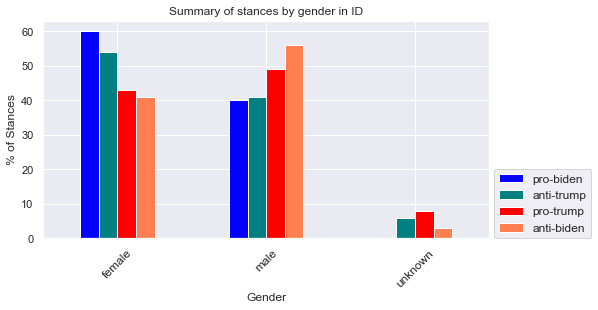

In [1213]:

contingency_gen = pd.crosstab(new_red_gender['pred_stance'], new_red_gender["gender_distribution"]) # all age group and all stances
print(contingency_gen)

##create row percentage for gender from gender contingency table

contingency_gen1 = contingency_gen.div(contingency_gen.sum(axis=1), axis=0)
print(contingency_gen1)
contingency_gen_per = (contingency_gen1*100).round()
print(contingency_gen_per)

##transpose dtaframe

contingency_gen_per_transpose = contingency_gen_per.T
print(contingency_gen_per_transpose)

## swap columns in dataframe
contingency_gen_per_transpose = contingency_gen_per_transpose[[0,3,1,2]]
contingency_gen_per_transpose

g = contingency_gen_per_transpose.plot(kind='bar', figsize=(8,4), color=['blue', 'teal', 'red', 'coral']);
plt.title('Summary of stances by gender in ID', fontsize=12);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('% of Stances', fontsize=12);
plt.xticks(rotation=45, fontsize=12)
newnames = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = [int(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
#plt.savefig("image/stance_gen_per_ID.png", dpi=300, bbox_inches = "tight") 
plt.show()


## Temporal Analysis

In [1214]:
new_pred = predicted_fb_all[predicted_fb_all.pred_issue != -1]
temp = new_pred[new_pred.pred_stance != -1]
temp = temp.reset_index(drop = True)
#temp

In [1215]:
hi = temp[temp.pred_stance != -1]
fi = hi[hi.pred_issue != -1]
fi.avg_imp.sum()/1000000 


11733.104273

In [1216]:
avg_imp = []
avg_spend = []
for j in range (0, temp.shape[0] ):
    dic_imp = eval(temp['impressions'][j])
    dic_cost = eval(temp['spend'][j])
    dic_imp_new = dict([k, float(v)] for k, v in dic_imp.items()) 
    dic_cost_new = dict([k, float(v)] for k, v in dic_cost.items()) 
    #print(dic_imp_new) 
    imp = sum(dic_imp_new.values()) / len(dic_imp_new)
    avg_imp.append(imp) # avg of impression
    cost = sum(dic_cost_new.values()) / len(dic_cost_new)
    avg_spend.append(cost) # avg of spend

In [1217]:
temp['avg_imp'] = avg_imp
temp['avg_spend'] = avg_spend
temp['date']= pd.to_datetime(temp['ad_delivery_start_time']) #convert string to date-time

## Timeseries of impressions based on 4 stances

In [1220]:
#Group by on stance and then resample 'weekly' on date and sum up average impression

# grp_temp = temp.groupby('pred_stance').resample('W-MON', on='date').agg({'avg_imp': 'sum'})
# print(grp_temp, grp_temp.shape) #169
# grp_temp.to_csv("data/bl.csv")

grp_temp = temp.pivot_table('avg_imp', index='date', columns='pred_stance', aggfunc='sum')
grp_temp

pred_stance,0,1,2,3
date,,,,
2020-01-01,9499.5,6999.0,NaN,8999.0
2020-01-02,NaN,12999.0,115498.5,2499.5
2020-01-03,NaN,NaN,NaN,766979.5
2020-01-04,NaN,NaN,112499.5,1498.5
2020-01-05,NaN,32499.5,NaN,2997.0
...,...,...,...,...
2020-10-31,20996883.5,22474818.0,3429652.0,5979282.5
2020-11-01,13835274.0,3040446.0,6539075.5,18641819.0
2020-11-02,3933833.0,8695740.5,5717440.0,2148404.0


<ipython-input-1222-f00261714380>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


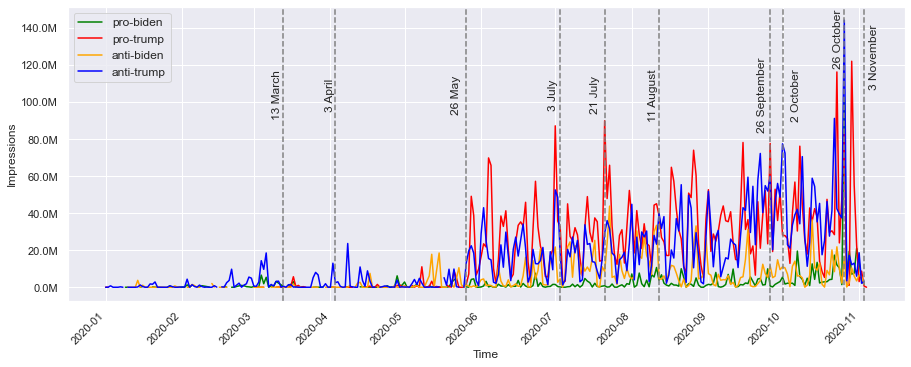

In [1222]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
sns.set()  # use Seaborn styles
g = grp_temp.plot(kind='line', figsize=(15,6), color=['green', 'red', 'orange', 'blue'])
plt.xlabel('Time', fontsize=12);
plt.ylabel('Impressions', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump' ]
ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(2), fontsize=12)
plt.xticks(rotation = 45)
# add vertical line
#plt.vlines(x=16.5, ymin=0, ymax=5, color='gray', label='political event')
#trans = g.get_xaxis_transform()

# March 13, President Trump called a national emergency, due to COVID-19.
g.axvline("2020-03-13", color="gray", linestyle="dashed")
plt.text(0.25, 0.7, '13 March', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#On April 3, President Trump fired Michael Atkinson, a senior official. 
g.axvline("2020-04-03", color="gray", linestyle="dashed")
plt.text(0.314, 0.7, '3 April', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#BLM -- May 26, 2020
g.axvline("2020-05-26", color="gray", linestyle="dashed")
#plt.text("2020-05-26", .7, 'May 26', transform=trans)
plt.text(0.464, 0.7, '26 May', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #June 2 Blackout Tuesday
# g.axvline("2020-06-02", color="gray", linestyle="dashed")
# plt.text(0.51, 0.7, '2 June', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# July 3, Trump holds a campaign rally at taxpayer expense at Mount Rushmore, South Dakota, as social distancing is ignored and few mask are worn by the 7,500 participants
g.axvline("2020-07-03", color="gray", linestyle="dashed")
plt.text(0.58, 0.7, '3 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#On July 22, it was announced that the Chinese consulate in Houston will close. 
#US Secretary of State Mike Pompeo stated the decision came after it was revealed that China was ?stealing? intellectual property. China condemned the decision, and various people can be seen burning papers outside the Houston consulate
# July 21, Twitter bans 7,000 QAnon accounts and limits 150,000 others.
g.axvline("2020-07-21", color="gray", linestyle="dashed")
plt.text(0.63, 0.7, '21 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#11 August Joe Biden Announces Running Mate Kamala Harris, the first African American woman to serve in the role
g.axvline("2020-08-12", color="gray", linestyle="dashed")
#plt.text("2020-08-12", .7, 'August 12', transform=trans)
plt.text(0.7, 0.7, '11 August', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#g.axvline("2020-09-16", color="gray", linestyle="dashed")

#President Trump Appoint Amy Coney Barrett = September 26, 2020 
g.axvline("2020-09-26", color="gray", linestyle="dashed")
plt.text(0.83, 0.7, '26 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

# #President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden
# g.axvline("2020-09-29", color="gray", linestyle="dashed")
# plt.text(0.86, 0.7, '29 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance
g.axvline("2020-10-01", color="gray", linestyle="dashed")
plt.text(.87, .7, '2 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# October 22, the second 2020 presidential debate takes place in Nashville, Tennessee.
#October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.
g.axvline("2020-10-26", color="gray", linestyle="dashed")
plt.text(.92, .89, '26 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #On October 25, Vice President Mike Pence have tested positive for coronavirus.
# g.axvline("2020-10-25", color="gray", linestyle="dashed")
# plt.text(.91, .83, '25 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #On October 27, police in Philadelphia fatally shot a black man = October 27
# g.axvline("2020-10-27", color="gray", linestyle="dashed")
# plt.text(.91, .83, '27 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# US 2020 election
g.axvline("2020-11-03", color="gray", linestyle="dashed")
plt.text(.964, .83, '3 November',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#plt.savefig("image/temporal_imp_stance.png", dpi=300, bbox_inches = "tight") 
plt.show()

###### Major events 

## collected from : https://www.infoplease.com/june-2020-current-events-us-news

March 13, President Trump called a national emergency, due to COVID-19.

On April 4, President Trump fired Michael Atkinson, a senior official. It is believed that Atkinson is the whistleblower that began the impeachment process of President Trump. 

blm protest start date = May 26, 2020 -- stance

Black Lives Matter Leads to Reforms = June 27, 2020 -- stance

July 2, 2020 Several states, including California and Indiana, postpone or reverse plans to reopen their economies, as the United States records 50,000 new cases of COVID-19—the largest one-day spike since the pandemic’s onset.

Joe Biden Announces Running Mate Kamala Harris who is a strong advocate for diversity and equality = August 11, 2020 

Protests Against Police Brutality Continue = August 24, 2020

President Trump to Appoint Amy Coney Barrett = September 26, 2020 

September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden

President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance

Trump Administration Imposes Restrictions on H-1B Visa as a result of the high unemployment rate in the country = October 7, 2020 -- anti-trump

October 19 various states reported record-breaking numbers regarding early votes ahead of the November 3 election. Many states have seen a dramatic increase in the number of absentee ballots. States are also seeing a boom in US postal ballot requests. So far, registered Democrats have voted more than registered Republicans. 

October 22 - The second 2020 presidential debate takes place in Nashville, Tennessee.

On October 25, Vice President Mike Pence have tested positive for coronavirus.

On October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.[385]


On October 26, police in Philadelphia fatally shot a black man = October 27




## Timeseries of impressions based on issues

In [1223]:
temp

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para,avg_imp,avg_spend,date
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2,499.5,49.5,2020-09-23
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0,499.5,49.5,2020-09-23
3,653784258879707,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001443', 'age': '18-24', 'g...",3,2,2,1499.5,49.5,2020-09-23
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811084,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0,499.5,49.5,2020-10-26
811085,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0,499.5,49.5,2020-10-26
811086,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0,1499.5,49.5,2020-10-26
811087,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0,499.5,49.5,2020-10-26


In [1224]:
temp['pred_issue'].value_counts().head(5)

10    272862
3     128017
4      94313
11     55113
1      54222
Name: pred_issue, dtype: int64

In [1225]:
top5_issue = temp.loc[(temp.pred_issue == 10) | (temp.pred_issue == 3) | (temp.pred_issue == 4) | (temp.pred_issue == 11) | (temp.pred_issue == 1)]


top5_issue



,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para,avg_imp,avg_spend,date
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0,499.5,49.5,2020-09-23
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
5,784599888779200,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.032787', 'age': '35-44', 'g...",2,3,0,499.5,49.5,2020-09-23
7,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3,2,4499.5,149.5,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811070,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.333333', 'region': 'Califor...","[{'percentage': '0.333333', 'age': '55-64', 'g...",0,10,0,499.5,49.5,2020-10-26
811071,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0,37499.5,1249.5,2020-10-26
811072,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0,274999.5,12499.5,2020-10-26
811073,2765797337011737,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.1', 'region': 'California'}...","[{'percentage': '0.1', 'age': '55-64', 'gender...",0,10,0,499.5,49.5,2020-10-26


In [1226]:
grp_temp_issue = temp.pivot_table('avg_imp', index='date', columns='pred_issue', aggfunc='sum')
#grp_temp_issue = top5_issue.pivot_table('avg_imp', index='date', columns='pred_issue', aggfunc='sum')

In [1227]:
grp_temp_issue

pred_issue,0,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9499.5,NaN,11498.5,4499.5,NaN
2020-01-02,NaN,NaN,2499.5,112999.0,NaN,NaN,NaN,NaN,NaN,NaN,2999.0,NaN,12499.5
2020-01-03,NaN,NaN,NaN,12499.5,199481.5,NaN,549999.5,NaN,NaN,NaN,NaN,4999.0,NaN
2020-01-04,NaN,499.5,NaN,112499.5,NaN,NaN,NaN,NaN,NaN,NaN,999.0,NaN,NaN
2020-01-05,NaN,NaN,NaN,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,33498.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,692995.0,623319.5,2475897.5,17625420.5,6203266.5,323489.5,622836.5,215475.5,2128434.0,1030938.0,17178831.0,3747233.0,12499.5
2020-11-01,295497.0,863469.5,105490.5,7773931.0,26437297.5,22997.0,677450.5,8494.5,477982.0,69990.0,2098550.5,1415471.0,1809993.5
2020-11-02,9498.5,86995.5,22497.5,7439882.0,3706841.5,30998.0,23498.5,4495.5,570485.5,146484.5,8281245.0,172495.5,NaN


<ipython-input-1228-3d70204e531c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


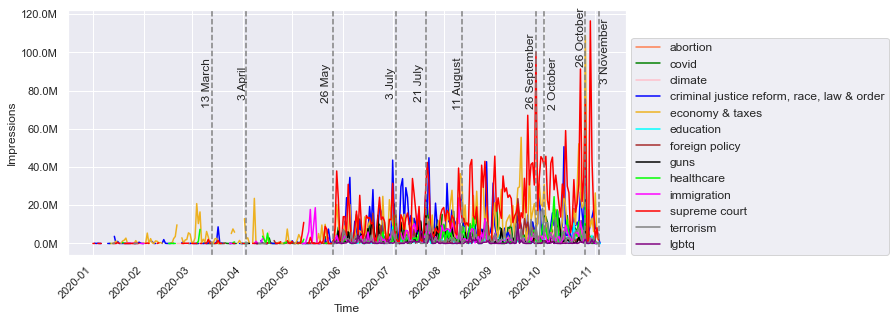

In [1228]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles
g = grp_temp_issue.plot(kind='line', figsize=(10,5), color=['coral', 'green', 'pink', 'blue', '#EDB120', 'cyan', 'brown', 'black', 'lime', 'magenta', 'red', 'gray','purple'])
#g = grp_temp_issue.plot(kind='line', figsize=(10,5), color=['cyan', 'green', 'orange', 'blue', 'red'])
plt.xlabel('Time', fontsize=12);
plt.ylabel('Impressions', fontsize=12);
newnames = ['abortion', 'covid', 'climate', 'criminal justice reform, race, law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
#newnames = [ 'covid', 'criminal justice reform, race, law & order', 'economy & taxes',  'supreme court', 'terrorism']
ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels)
# g.legend(newnames,loc=(1.01, 0), fontsize=12)
# plt.xticks(rotation = 45)
# #g.get_legend().remove()
# #plt.savefig("image/temporal_imp_issue.png", dpi=300, bbox_inches = "tight") 
# plt.show()

g.set_yticklabels(ylabels)
g.legend(newnames,loc=(2), fontsize=12)
plt.xticks(rotation = 45)
# add vertical line
#plt.vlines(x=16.5, ymin=0, ymax=5, color='gray', label='political event')
#trans = g.get_xaxis_transform()

# March 13, President Trump called a national emergency, due to COVID-19.
g.axvline("2020-03-13", color="gray", linestyle="dashed")
plt.text(0.25, 0.7, '13 March', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#On April 3, President Trump fired Michael Atkinson, a senior official. 
g.axvline("2020-04-03", color="gray", linestyle="dashed")
plt.text(0.314, 0.7, '3 April', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#BLM -- May 26, 2020
g.axvline("2020-05-26", color="gray", linestyle="dashed")
#plt.text("2020-05-26", .7, 'May 26', transform=trans)
plt.text(0.464, 0.7, '26 May', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #June 2 Blackout Tuesday
# g.axvline("2020-06-02", color="gray", linestyle="dashed")
# plt.text(0.51, 0.7, '2 June', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# July 3, Trump holds a campaign rally at taxpayer expense at Mount Rushmore, South Dakota, as social distancing is ignored and few mask are worn by the 7,500 participants
g.axvline("2020-07-03", color="gray", linestyle="dashed")
plt.text(0.58, 0.7, '3 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#On July 22, it was announced that the Chinese consulate in Houston will close. 
#US Secretary of State Mike Pompeo stated the decision came after it was revealed that China was ?stealing? intellectual property. China condemned the decision, and various people can be seen burning papers outside the Houston consulate
# July 21, Twitter bans 7,000 QAnon accounts and limits 150,000 others.
g.axvline("2020-07-21", color="gray", linestyle="dashed")
plt.text(0.63, 0.7, '21 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#11 August Joe Biden Announces Running Mate Kamala Harris, the first African American woman to serve in the role
g.axvline("2020-08-12", color="gray", linestyle="dashed")
#plt.text("2020-08-12", .7, 'August 12', transform=trans)
plt.text(0.7, 0.7, '11 August', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#g.axvline("2020-09-16", color="gray", linestyle="dashed")

#President Trump Appoint Amy Coney Barrett = September 26, 2020 
g.axvline("2020-09-26", color="gray", linestyle="dashed")
plt.text(0.83, 0.75, '26 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

# #President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden
# g.axvline("2020-09-29", color="gray", linestyle="dashed")
# plt.text(0.86, 0.7, '29 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance
g.axvline("2020-10-01", color="gray", linestyle="dashed")
plt.text(.87, .7, '2 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# October 22, the second 2020 presidential debate takes place in Nashville, Tennessee.
#October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.
g.axvline("2020-10-26", color="gray", linestyle="dashed")
plt.text(.92, .89, '26 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #On October 25, Vice President Mike Pence have tested positive for coronavirus.
# g.axvline("2020-10-25", color="gray", linestyle="dashed")
# plt.text(.91, .83, '25 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #On October 27, police in Philadelphia fatally shot a black man = October 27
# g.axvline("2020-10-27", color="gray", linestyle="dashed")
# plt.text(.91, .83, '27 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# US 2020 election
g.axvline("2020-11-03", color="gray", linestyle="dashed")
plt.text(.964, .83, '3 November',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)
g.legend(newnames,loc=(1.01, 0), fontsize=12)

#plt.savefig("image/temporal_imp_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()


## poll data
### https://projects.fivethirtyeight.com/2020-general-data/presidential_poll_averages_2020.csv
### details here: https://github.com/fivethirtyeight/data/tree/master/election-forecasts-2020

#### pct_estimate = Polling average for the candidate listed in candidate_name on modeldate

In [1229]:
# ### Load poll data
poll = pd.read_csv( 'data/presidential_poll_averages_2020.csv',low_memory=False) 
poll #29085 rows × 6 columns

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101
...,...,...,...,...,...,...
29080,2020,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325
29081,2020,Colorado,2/27/2020,Donald Trump,44.27899,44.07662
29082,2020,California,2/27/2020,Donald Trump,34.66504,34.69761
29083,2020,Arizona,2/27/2020,Donald Trump,47.79450,48.07208


In [1230]:
poll['date']= pd.to_datetime(poll['modeldate']) #convert string to date-time
poll

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted,date
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599,2020-11-03
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584,2020-11-03
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517,2020-11-03
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408,2020-11-03
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101,2020-11-03
...,...,...,...,...,...,...,...
29080,2020,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325,2020-02-27
29081,2020,Colorado,2/27/2020,Donald Trump,44.27899,44.07662,2020-02-27
29082,2020,California,2/27/2020,Donald Trump,34.66504,34.69761,2020-02-27
29083,2020,Arizona,2/27/2020,Donald Trump,47.79450,48.07208,2020-02-27


In [1231]:
grp_poll = poll.pivot_table('pct_estimate', index='date', columns='candidate_name', aggfunc='sum')

In [1232]:
grp_poll

candidate_name,Convention Bounce for Donald Trump,Convention Bounce for Joseph R. Biden Jr.,Donald Trump,Joseph R. Biden Jr.
date,,,,
2020-02-27,NaN,NaN,1469.716190,1428.02355
2020-02-28,NaN,NaN,1523.854630,1470.34322
2020-02-29,NaN,NaN,1523.834290,1470.31869
2020-03-01,NaN,NaN,1524.369780,1471.39732
2020-03-02,NaN,NaN,1524.229280,1471.06990
...,...,...,...,...
2020-10-30,2258.00179,2246.55969,2495.264048,2769.07493
2020-10-31,2256.16503,2244.74233,2500.143010,2772.52089
2020-11-01,2253.64880,2243.04322,2508.531062,2777.79229


In [1233]:

new_poll = grp_poll.drop(columns=['Convention Bounce for Donald Trump', 'Convention Bounce for Joseph R. Biden Jr.'])
new_poll

candidate_name,Donald Trump,Joseph R. Biden Jr.
date,,
2020-02-27,1469.716190,1428.02355
2020-02-28,1523.854630,1470.34322
2020-02-29,1523.834290,1470.31869
2020-03-01,1524.369780,1471.39732
2020-03-02,1524.229280,1471.06990
...,...,...
2020-10-30,2495.264048,2769.07493
2020-10-31,2500.143010,2772.52089
2020-11-01,2508.531062,2777.79229


<ipython-input-1234-07facbb1d259>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


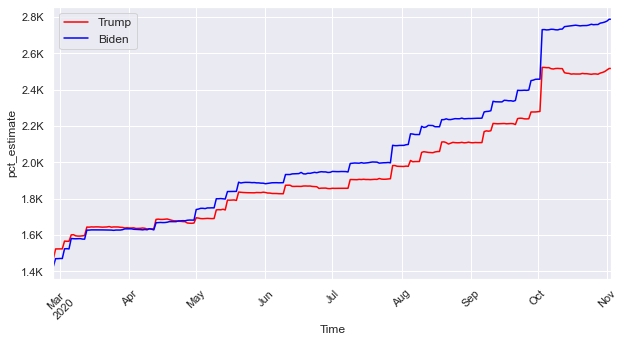

In [1234]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles
g = new_poll.plot(kind='line', figsize=(10,5), color=['red', 'blue'])
plt.xlabel('Time', fontsize=12);
plt.ylabel('pct_estimate', fontsize=12);
newnames = ['Trump', 'Biden']
ylabels = ['{}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(2), fontsize=12)
plt.xticks(rotation = 45)
#g.get_legend().remove()
#plt.savefig("image/temporal_imp_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()


In [1235]:
#replace nan with 0 in pandas
fb = grp_temp.fillna(0)
fb

pred_stance,0,1,2,3
date,,,,
2020-01-01,9499.5,6999.0,0.0,8999.0
2020-01-02,0.0,12999.0,115498.5,2499.5
2020-01-03,0.0,0.0,0.0,766979.5
2020-01-04,0.0,0.0,112499.5,1498.5
2020-01-05,0.0,32499.5,0.0,2997.0
...,...,...,...,...
2020-10-31,20996883.5,22474818.0,3429652.0,5979282.5
2020-11-01,13835274.0,3040446.0,6539075.5,18641819.0
2020-11-02,3933833.0,8695740.5,5717440.0,2148404.0


In [1236]:
sum_trump = fb[1] + fb[2]
sum_biden = fb[0] + fb[3]
fb["ad_trump"] = sum_trump
fb["ad_biden"] = sum_biden
fb

pred_stance,0,1,2,3,ad_trump,ad_biden
date,,,,,,
2020-01-01,9499.5,6999.0,0.0,8999.0,6999.0,18498.5
2020-01-02,0.0,12999.0,115498.5,2499.5,128497.5,2499.5
2020-01-03,0.0,0.0,0.0,766979.5,0.0,766979.5
2020-01-04,0.0,0.0,112499.5,1498.5,112499.5,1498.5
2020-01-05,0.0,32499.5,0.0,2997.0,32499.5,2997.0
...,...,...,...,...,...,...
2020-10-31,20996883.5,22474818.0,3429652.0,5979282.5,25904470.0,26976166.0
2020-11-01,13835274.0,3040446.0,6539075.5,18641819.0,9579521.5,32477093.0
2020-11-02,3933833.0,8695740.5,5717440.0,2148404.0,14413180.5,6082237.0


In [1237]:
fb = fb.drop(columns=[0,1,2,3])
fb

pred_stance,ad_trump,ad_biden
date,,
2020-01-01,6999.0,18498.5
2020-01-02,128497.5,2499.5
2020-01-03,0.0,766979.5
2020-01-04,112499.5,1498.5
2020-01-05,32499.5,2997.0
...,...,...
2020-10-31,25904470.0,26976166.0
2020-11-01,9579521.5,32477093.0
2020-11-02,14413180.5,6082237.0


In [1238]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.transforms as transforms
# sns.set()  # use Seaborn styles
# g = fb.plot(kind='line', figsize=(15,6), color=['red', 'blue'])
# plt.xlabel('Time', fontsize=12);
# plt.ylabel('Impressions', fontsize=12);
# newnames = ['pro-trump', 'pro-biden']
# ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels)
# g.legend(newnames,loc=(2), fontsize=12)
# plt.xticks(rotation = 45)
# # add vertical line
# #plt.vlines(x=16.5, ymin=0, ymax=5, color='gray', label='political event')
# #trans = g.get_xaxis_transform()

# # March 13, President Trump called a national emergency, due to COVID-19.
# g.axvline("2020-03-13", color="gray", linestyle="dashed")
# plt.text(0.25, 0.7, '13 March', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



# #On April 3, President Trump fired Michael Atkinson, a senior official. 
# g.axvline("2020-04-03", color="gray", linestyle="dashed")
# plt.text(0.314, 0.7, '3 April', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# #BLM -- May 26, 2020
# g.axvline("2020-05-26", color="gray", linestyle="dashed")
# #plt.text("2020-05-26", .7, 'May 26', transform=trans)
# plt.text(0.464, 0.7, '26 May', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #June 2 Blackout Tuesday
# # g.axvline("2020-06-02", color="gray", linestyle="dashed")
# # plt.text(0.51, 0.7, '2 June', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# # July 3, Trump holds a campaign rally at taxpayer expense at Mount Rushmore, South Dakota, as social distancing is ignored and few mask are worn by the 7,500 participants
# g.axvline("2020-07-03", color="gray", linestyle="dashed")
# plt.text(0.58, 0.7, '3 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# #On July 22, it was announced that the Chinese consulate in Houston will close. 
# #US Secretary of State Mike Pompeo stated the decision came after it was revealed that China was ?stealing? intellectual property. China condemned the decision, and various people can be seen burning papers outside the Houston consulate
# # July 21, Twitter bans 7,000 QAnon accounts and limits 150,000 others.
# g.axvline("2020-07-21", color="gray", linestyle="dashed")
# plt.text(0.63, 0.7, '21 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



# #11 August Joe Biden Announces Running Mate Kamala Harris, the first African American woman to serve in the role
# g.axvline("2020-08-11", color="gray", linestyle="dashed")
# #plt.text("2020-08-12", .7, 'August 12', transform=trans)
# plt.text(0.7, 0.7, '11 August', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #g.axvline("2020-09-16", color="gray", linestyle="dashed")

# #President Trump Appoint Amy Coney Barrett = September 26, 2020 
# g.axvline("2020-09-26", color="gray", linestyle="dashed")
# plt.text(0.83, 0.7, '26 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

# # #President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden
# # g.axvline("2020-09-29", color="gray", linestyle="dashed")
# # plt.text(0.86, 0.7, '29 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance
# g.axvline("2020-10-01", color="gray", linestyle="dashed")
# plt.text(.87, .7, '2 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # October 22, the second 2020 presidential debate takes place in Nashville, Tennessee.
# #October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.
# g.axvline("2020-10-26", color="gray", linestyle="dashed")
# plt.text(.92, .89, '26 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # # #On October 25, Vice President Mike Pence have tested positive for coronavirus.
# # g.axvline("2020-10-25", color="gray", linestyle="dashed")
# # plt.text(.91, .83, '25 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #On October 27, police in Philadelphia fatally shot a black man = October 27
# # g.axvline("2020-10-27", color="gray", linestyle="dashed")
# # plt.text(.91, .83, '27 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# # US 2020 election
# g.axvline("2020-11-03", color="gray", linestyle="dashed")
# plt.text(.964, .83, '3 November',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# #plt.savefig("image/temporal_imp_stance.png", dpi=300, bbox_inches = "tight") 
# plt.show()

In [1239]:
fb_idx = fb.index
poll_idx = new_poll.index

In [1240]:
fb['date'] = fb_idx.values
new_poll['date'] = poll_idx.values

In [1241]:
new_poll = new_poll.reset_index(drop=True)
fb = fb.reset_index(drop=True) 

In [1242]:
new_poll

candidate_name,Donald Trump,Joseph R. Biden Jr.,date
0,1469.716190,1428.02355,2020-02-27
1,1523.854630,1470.34322,2020-02-28
2,1523.834290,1470.31869,2020-02-29
3,1524.369780,1471.39732,2020-03-01
4,1524.229280,1471.06990,2020-03-02
...,...,...,...
246,2495.264048,2769.07493,2020-10-30
247,2500.143010,2772.52089,2020-10-31
248,2508.531062,2777.79229,2020-11-01
249,2517.120871,2788.06803,2020-11-02


In [1243]:
fb

pred_stance,ad_trump,ad_biden,date
0,6999.0,18498.5,2020-01-01
1,128497.5,2499.5,2020-01-02
2,0.0,766979.5,2020-01-03
3,112499.5,1498.5,2020-01-04
4,32499.5,2997.0,2020-01-05
...,...,...,...
302,25904470.0,26976166.0,2020-10-31
303,9579521.5,32477093.0,2020-11-01
304,14413180.5,6082237.0,2020-11-02
305,2230325.5,4498200.0,2020-11-03


In [1244]:
#compare two dataframes based on certain column values and remove rest

new_fb = fb.merge(new_poll,how='left').dropna()
new_fb = new_fb.reset_index(drop = True)


In [1245]:
new_fb

,ad_trump,ad_biden,date,Donald Trump,Joseph R. Biden Jr.
0,0.0,2207453.5,2020-02-27,1469.716190,1428.02355
1,0.0,5686820.5,2020-02-28,1523.854630,1470.34322
2,0.0,4909377.5,2020-02-29,1523.834290,1470.31869
3,12499.5,981944.5,2020-03-01,1524.369780,1471.39732
4,2999.0,527982.5,2020-03-02,1524.229280,1471.06990
...,...,...,...,...,...
245,61385394.0,20626131.0,2020-10-30,2495.264048,2769.07493
246,25904470.0,26976166.0,2020-10-31,2500.143010,2772.52089
247,9579521.5,32477093.0,2020-11-01,2508.531062,2777.79229
248,14413180.5,6082237.0,2020-11-02,2517.120871,2788.06803


In [1246]:
ad_pol = new_fb.rename({'Donald Trump': 'poll_trump', 'Joseph R. Biden Jr.': 'poll_biden'}, axis='columns')


In [1247]:
ad_pol

,ad_trump,ad_biden,date,poll_trump,poll_biden
0,0.0,2207453.5,2020-02-27,1469.716190,1428.02355
1,0.0,5686820.5,2020-02-28,1523.854630,1470.34322
2,0.0,4909377.5,2020-02-29,1523.834290,1470.31869
3,12499.5,981944.5,2020-03-01,1524.369780,1471.39732
4,2999.0,527982.5,2020-03-02,1524.229280,1471.06990
...,...,...,...,...,...
245,61385394.0,20626131.0,2020-10-30,2495.264048,2769.07493
246,25904470.0,26976166.0,2020-10-31,2500.143010,2772.52089
247,9579521.5,32477093.0,2020-11-01,2508.531062,2777.79229
248,14413180.5,6082237.0,2020-11-02,2517.120871,2788.06803


## Granger Causality

### Do AdsImpressions Granger-cause Poll count ??
#### Null hypothesis (H0): AdsImpressions do not Granger cause Poll count
#### Alternative Hypothesis (HA) : AdsImpressions Granger-cause Poll count




In [1248]:
from statsmodels.tsa.stattools import grangercausalitytests



In [1249]:
def do_granger(ac, pc, lags):
    #The data for test whether the time series in the second column Granger causes the time series in the first column.
    input = np.stack((pc, ac), 1) #Do AdsImpressions Granger-cause Poll count ?
    #input = np.stack((ac, pc), 1) #other way..Do Poll counts Granger-cause AdsImpressions ?
   
    gc = grangercausalitytests(input, maxlag = lags ) #outputs all lags
    p_val = []
    F = []
    for key, value in gc.items() :
        #print (key,value)
        #print ("value[0]", value[0])
#         p_val = []
        for k, v in value[0].items() :
            #print("k,v", k,v)
            #print(k)
            #print(v)
            #print(v[0])
            #print(type(v[0]))
            if k == 'ssr_ftest':
                #print(v, type (v))
                #print('p-value', v[1])
                if v[0] < 0.00001:
                    F.append(float(0.0001))
                else:    
                    F.append(v[0])
                p_val.append(v[1])

    print(p_val, F)
                
    return p_val, F    

In [1250]:
#######......Granger ............

#For Trump ad and poll
act = np.array(ad_pol.ad_trump)
pct = np.array(ad_pol.poll_trump)

lags = 25
p_valt1, FT1 = do_granger(act, pct, lags)

#For Biden ad and poll
acb = np.array(ad_pol.ad_biden)
pcb = np.array(ad_pol.poll_biden)
p_valb1, FB1 = do_granger(acb, pcb, lags)


    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9926  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9926  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9926  , df=1
parameter F test:         F=0.0001  , p=0.9926  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0068  , p=0.9932  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=0.0140  , p=0.9930  , df=2
likelihood ratio test: chi2=0.0140  , p=0.9930  , df=2
parameter F test:         F=0.0068  , p=0.9932  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0229  , p=0.9953  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=0.0708  , p=0.9951  , df=3
likelihood ratio test: chi2=0.0708  , p=0.9951  , df=3
parameter F test:         F=0.0229  , p=0.9953  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0175  , p=0.9994  

ssr based F test:         F=1.0763  , p=0.3813  , df_denom=222, df_num=9
ssr based chi2 test:   chi2=10.5159 , p=0.3104  , df=9
likelihood ratio test: chi2=10.2929 , p=0.3273  , df=9
parameter F test:         F=1.0763  , p=0.3813  , df_denom=222, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.0125  , p=0.4337  , df_denom=219, df_num=10
ssr based chi2 test:   chi2=11.0960 , p=0.3501  , df=10
likelihood ratio test: chi2=10.8471 , p=0.3696  , df=10
parameter F test:         F=1.0125  , p=0.4337  , df_denom=219, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.5521  , p=0.1148  , df_denom=216, df_num=11
ssr based chi2 test:   chi2=18.8913 , p=0.0631  , df=11
likelihood ratio test: chi2=18.1818 , p=0.0775  , df=11
parameter F test:         F=1.5521  , p=0.1148  , df_denom=216, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.5000  , p=0.1257  , df_denom=213, df_num=12
ssr based

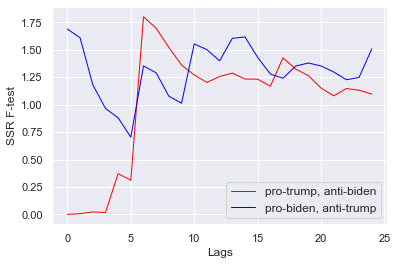

In [1251]:
import matplotlib.pyplot as plt
plt.plot(FT1, '-', color='red',  label='pro-trump, anti-biden', linewidth = 1)
plt.plot(FB1, '-', color='blue', label='pro-biden, anti-trump',  linewidth = 1)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('SSR F-test', fontsize=12)
plt.legend(loc=(4), fontsize=12)
#plt.legend()

#plt.savefig("image/gc2.png",  bbox_inches = "tight") 
plt.show()

### Now repeat the Granger causality test in the opposite direction.

### Do Poll counts Granger-cause  AdsImpressions  ??
#### Null Hypothesis (H0) : Poll counts do not Granger-cause  AdsImpressions
#### Alternative Hypothesis (HA) : Poll counts Granger-cause  AdsImpressions

In [1252]:
def do_grangerAlt(ac, pc, lags):
    #The data for test whether the time series in the second column Granger causes the time series in the first column.
    input = np.stack((ac, pc), 1) #other way..Do Poll counts Granger-cause AdsImpressions ?
   
    gc = grangercausalitytests(input, maxlag = lags ) #outputs all lags
    p_val = []
    F = []
    for key, value in gc.items() :
        #print (key,value)
        #print ("value[0]", value[0])
#         p_val = []
        for k, v in value[0].items() :
            #print("k,v", k,v)
            #print(k)
            #print(v)
            #print(v[0])
            #print(type(v[0]))
            if k == 'ssr_ftest':
                #print(v, type (v))
                #print('p-value', v[1])
                if v[0] < 0.00001:
                    F.append(float(0.0001))
                else:    
                    F.append(v[0])
                p_val.append(v[1])

    print(p_val, F)
                
    return p_val, F    

In [1253]:
#For Trump ad and poll
act = np.array(ad_pol.ad_trump)
pct = np.array(ad_pol.poll_trump)

lags = 25
p_valt2, FT2 = do_grangerAlt(act, pct, lags)

#For Biden ad and poll
acb = np.array(ad_pol.ad_biden)
pcb = np.array(ad_pol.poll_biden)
p_valb2, FB2 = do_grangerAlt(acb, pcb, lags)


    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=33.0782 , p=0.0000  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=33.4816 , p=0.0000  , df=1
likelihood ratio test: chi2=31.4140 , p=0.0000  , df=1
parameter F test:         F=33.0782 , p=0.0000  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.5121 , p=0.0000  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=31.6626 , p=0.0000  , df=2
likelihood ratio test: chi2=29.7984 , p=0.0000  , df=2
parameter F test:         F=15.5121 , p=0.0000  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5357  , p=0.0001  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=23.2664 , p=0.0000  , df=3
likelihood ratio test: chi2=22.2349 , p=0.0001  , df=3
parameter F test:         F=7.5357  , p=0.0001  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9151  , p=0.0008  

parameter F test:         F=2.6306  , p=0.0090  , df_denom=225, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.5876  , p=0.0074  , df_denom=222, df_num=9
ssr based chi2 test:   chi2=25.2813 , p=0.0027  , df=9
likelihood ratio test: chi2=24.0413 , p=0.0042  , df=9
parameter F test:         F=2.5876  , p=0.0074  , df_denom=222, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3203  , p=0.0130  , df_denom=219, df_num=10
ssr based chi2 test:   chi2=25.4282 , p=0.0046  , df=10
likelihood ratio test: chi2=24.1693 , p=0.0072  , df=10
parameter F test:         F=2.3203  , p=0.0130  , df_denom=219, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=2.4057  , p=0.0078  , df_denom=216, df_num=11
ssr based chi2 test:   chi2=29.2805 , p=0.0021  , df=11
likelihood ratio test: chi2=27.6211 , p=0.0037  , df=11
parameter F test:         F=2.4057  , p=0.0078  , df_denom=216, df_num=11

Granger Ca

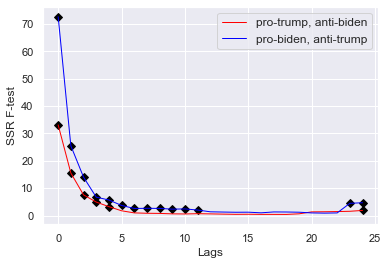

In [1254]:
import matplotlib.pyplot as plt
markers_xT = [0, 1, 2, 3, 4, 24]
for i in markers_xT:
    plt.plot(i, FT2[i], 'D', color = 'black')
    
markers_xB = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 24]
for i in markers_xB:
    plt.plot(i, FB2[i], 'D', color = 'black')
    
plt.plot(FT2, '-', color='red', label='pro-trump, anti-biden', linewidth = 1)
plt.plot(FB2, '-', color='blue', label='pro-biden, anti-trump', linewidth = 1)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('SSR F-test', fontsize=12)
plt.legend(loc=(1), fontsize=12)
#g.legend(newnames,loc=(2), fontsize=12)
#plt.savefig("image/gc1.png",  bbox_inches = "tight") 
plt.show()